In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

Loaded  3 encoders.


In [3]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

# Lendo o arquivo Lamost

In [4]:
#csv = pd.read_csv("SPLUSiDR4_GaiaEDR3_BJ21_LAMOSTDR7_SEGUE.csv", encoding='latin-1', index_col=['ID', 'RA_SPLUS', 'DEC_SPLUS'])
baseMolde = pd.read_table("lamost_splus.dat", encoding='latin-1', delimiter='& ', index_col = 'ObsID', engine='python')

In [5]:
baseMolde

,#MObsID,Target,Obs.Date,LMJD,MJD,PlanId,spId,FiberId,Band,RAdeg,...,CLASS_STAR_i,mag_psf_J0861,emag_psf_J0861,s2n_psf_J0861,CLASS_STAR_J0861,mag_psf_z,emag_psf_z,s2n_psf_z,CLASS_STAR_z,EBV_SCH
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,589602184B,J233844.52-015122.3,2017-09-29,58026,58025,HIP11715101,2,184,B,354.68551,...,1.0,13.13994,0.006,180.50000,1.0,13.12994,0.007,154.71428,1.0,-999
589602185,589602185B,J233823.19-015922.2,2017-09-29,58026,58025,HIP11715101,2,185,B,354.59664,...,-999.0,12.61175,0.007,154.71428,1.0,12.60575,0.006,180.50000,1.0,-999
589602186,589602186B,J233923.71-015452.6,2017-09-29,58026,58025,HIP11715101,2,186,B,354.84882,...,1.0,12.95712,0.007,154.71428,1.0,12.95012,0.006,180.50000,1.0,-999
589603005,589603005B,J234304.04-010701.6,2017-09-29,58026,58025,HIP11715101,3,5,B,355.76684,...,-999.0,12.56246,0.011,98.45454,1.0,-999.00000,-999.000,-999.00000,-999.0,-999
589603006,589603006B,J234206.70-010231.8,2017-09-29,58026,58025,HIP11715101,3,6,B,355.52792,...,-999.0,12.38345,0.013,83.30769,1.0,-999.00000,-999.000,-999.00000,-999.0,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914247,695914247B,J235623.59-012648.5,2018-11-30,58453,58452,NT000518S014738M01,14,247,B,359.09833,...,1.0,14.70269,0.010,108.30000,1.0,14.70969,0.005,216.60001,1.0,-999
695916006,695916006B,J235653.46-004021.4,2018-11-30,58453,58452,NT000518S014738M01,16,6,B,359.22276,...,-999.0,12.42019,0.018,60.16667,1.0,12.40719,0.009,120.33334,1.0,-999
695914229,695914229R,J235625.67-012758.1,2018-11-30,58453,58452,NT000518S014738M01,14,229,R,359.10697,...,1.0,14.32573,0.009,120.33334,1.0,14.30473,0.005,216.60001,1.0,-999


In [5]:
for column in baseMolde:
    print(column)

#MObsID
Target
Obs.Date
LMJD
MJD
PlanId
spId
FiberId
Band
RAdeg
DEdeg
snr
objType
magType
mag1
mag2
mag3
mag4
mag5
mag6
mag7
tsource
FiberType
tfrom
tcomment
offsets
offsetsv
RAOdeg
DEOdeg
Tefflasp
e_Tefflasp
logglasp
e_logglasp
[Fe/H]
e_[Fe/H]
vsini
RVb0
e_RVb0
RVb1
e_RVb1
f_RVb
RVr0
e_RVr0
RVr1
e_RVr1
f_RVr
RVbr0
e_RVbr0
RVbr1
e_RVbr1
f_RVbr
RVlasp0
e_RVlasp0
RVlasp1
e_RVlasp1
coadd
alphacnn
Teffcnn
loggcnn
[Fe/H]cnn
[C/Fe]
[N/Fe]
[O/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[S/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Cu/Fe]
GaiaDR2
Gmag
SPLUS-IDs
RAJ2000
DEJ2000
mag_psf_u
emag_psf_u
s2n_psf_u
CLASS_STAR_u
mag_psf_J0378
emag_psf_J0378
s2n_psf_J0378
CLASS_STAR_J0378
mag_psf_J0395
emag_psf_J0395
s2n_psf_J0395
CLASS_STAR_J0395
mag_psf_J0410
emag_psf_J0410
s2n_psf_J0410
CLASS_STAR_J0410
mag_psf_J0430
emag_psf_J0430
s2n_psf_J0430
CLASS_STAR_J0430
mag_psf_g
emag_psf_g
s2n_psf_g
CLASS_STAR_g
mag_psf_J0515
emag_psf_J0515
s2n_psf_J0515
CLASS_STAR_J0515
mag_psf_r
emag_psf_r
s2n_psf_r
CLASS_STAR_r
mag_psf_J0660


In [32]:
baseParametros

,Tefflasp,logglasp,[Fe/H],Teffcnn,loggcnn,[Fe/H]cnn,[C/Fe],[N/Fe],[O/Fe],[Mg/Fe],[Al/Fe],[Si/Fe],[S/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Cu/Fe]
ObsID,,,,,,,,,,,,,,,,,,
589602184,5780.02,4.199,-0.464,5778.14,4.327,-0.328,0.02842,0.25352,-9999.0,0.04902,-9999.0,-0.01506,-9999.0,0.13247,-9999.0,-9999.0,-0.00297,-9999.0
589602185,5753.16,4.054,-0.064,5805.47,4.206,0.014,0.03332,0.22013,-9999.0,0.01190,-9999.0,0.01152,-9999.0,-0.01401,-9999.0,-9999.0,0.03999,-9999.0
589602186,5930.44,4.120,-0.093,5832.24,4.209,-0.033,0.03817,0.15515,-9999.0,0.01171,-9999.0,0.02098,-9999.0,-0.00359,-9999.0,-9999.0,0.03895,-9999.0
589603005,5199.33,3.740,-0.449,5129.13,3.397,-0.451,0.01758,-0.05728,-9999.0,0.08874,-9999.0,0.01796,-9999.0,0.09741,-9999.0,-9999.0,0.02972,-9999.0
589603006,5168.41,3.744,-0.123,5197.15,3.673,-0.166,0.01389,0.04177,-9999.0,0.04586,-9999.0,-0.00632,-9999.0,0.04014,-9999.0,-9999.0,0.04143,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914247,5649.31,4.084,-0.140,5698.10,4.195,-0.143,0.00279,0.14076,-9999.0,0.04914,-9999.0,0.02339,-9999.0,0.00705,-9999.0,-9999.0,0.02561,-9999.0
695916006,5165.60,4.515,0.405,5035.25,4.356,0.227,0.02723,0.21093,-9999.0,-0.00839,-9999.0,0.06239,-9999.0,-0.05861,-9999.0,-9999.0,0.10442,-9999.0
695914229,4665.38,4.555,-0.410,-9999.00,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.00000,-9999.0,-9999.0,-9999.00000,-9999.0


In [12]:
pd.Series(baseParametros['logglasp']).value_counts()

4.261    11
4.178    10
4.131     8
4.037     8
4.104     8
         ..
2.379     1
3.276     1
2.889     1
2.374     1
4.515     1
Name: logglasp, Length: 1537, dtype: int64

In [17]:
pd.Series(baseParametros['[Mg/Fe]']).value_counts()

-9999.00000    676
 0.02346         3
 0.04160         3
 0.05227         3
 0.02151         3
              ... 
 0.02341         1
-0.11962         1
 0.04538         1
 0.04089         1
-0.00839         1
Name: [Mg/Fe], Length: 2660, dtype: int64

In [25]:
baseFiltrada = baseMolde.loc[(baseMolde['Teffcnn'] != -9999) & (baseMolde['Teffcnn'] != '-9999'),
                            ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                            'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                            'mag_psf_J0515', 'mag_psf_r', 'mag_psf_J0660', 
                            'mag_psf_i', 'mag_psf_J0861', 'mag_psf_z',
                            'Teffcnn', 'loggcnn', '[Fe/H]cnn', 
                            '[C/Fe]', '[N/Fe]', '[O/Fe]', '[Mg/Fe]', 
                            '[Al/Fe]', '[Si/Fe]', '[S/Fe]', '[Ca/Fe]', 
                            '[Ti/Fe]', '[Cr/Fe]', '[Ni/Fe]', '[Cu/Fe]']]

In [29]:
baseFiltrada
#baseFiltrada.to_csv("E:\IC\BasesRedeNeural\BaseFiltrada.csv")

,mag_psf_u,mag_psf_J0378,mag_psf_J0395,mag_psf_J0410,mag_psf_J0430,mag_psf_g,mag_psf_J0515,mag_psf_r,mag_psf_J0660,mag_psf_i,...,[O/Fe],[Mg/Fe],[Al/Fe],[Si/Fe],[S/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Cu/Fe]
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,15.01453,14.64653,14.58852,14.11853,14.04753,13.76753,13.59553,13.30540,13.27640,13.15562,...,-9999.0,0.04902,-9999.0,-0.01506,-9999.0,0.13247,-9999.0,-9999.0,-0.00297,-9999.0
589602185,14.59844,14.24744,14.14344,13.59617,13.52717,13.21817,13.02917,12.77164,12.73564,-999.00000,...,-9999.0,0.01190,-9999.0,0.01152,-9999.0,-0.01401,-9999.0,-9999.0,0.03999,-9999.0
589602186,14.87307,14.48807,14.41307,13.89239,13.83339,13.54339,13.36439,13.09807,13.08907,12.96533,...,-9999.0,0.01171,-9999.0,0.02098,-9999.0,-0.00359,-9999.0,-9999.0,0.03895,-9999.0
589603005,15.21299,14.83499,14.72799,14.11035,14.01635,13.49035,13.26735,-999.00000,-999.00000,-999.00000,...,-9999.0,0.08874,-9999.0,0.01796,-9999.0,0.09741,-9999.0,-9999.0,0.02972,-9999.0
589603006,-999.00000,14.88259,14.69559,13.99569,13.86868,13.32628,13.10569,-999.00000,-999.00000,-999.00000,...,-9999.0,0.04586,-9999.0,-0.00632,-9999.0,0.04014,-9999.0,-9999.0,0.04143,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914244,13.70579,13.34379,13.26200,12.80611,12.74011,12.43811,12.26611,-999.00000,-999.00000,-999.00000,...,-9999.0,0.00444,-9999.0,0.00882,-9999.0,-0.00882,-9999.0,-9999.0,0.01199,-9999.0
695914245,14.74633,14.33324,14.30027,13.85634,13.79507,13.52007,13.33807,13.07952,13.05552,12.95067,...,-9999.0,0.21172,-9999.0,0.15608,-9999.0,0.20675,-9999.0,-9999.0,0.02067,-9999.0
695914246,14.59593,14.19393,14.15923,13.65657,13.60657,13.29057,13.11457,12.84430,12.81830,-999.00000,...,-9999.0,0.20603,-9999.0,0.10985,-9999.0,0.12273,-9999.0,-9999.0,0.02266,-9999.0


In [31]:
pd.Series(baseFiltrada['Teffcnn']).value_counts()

5426.81    2
4734.73    2
4861.75    2
5662.68    2
5508.74    2
          ..
5863.13    1
5706.42    1
5010.44    1
5184.39    1
5035.25    1
Name: Teffcnn, Length: 2742, dtype: int64

# Configurando rede Neural

##### Generate Weights

In [5]:
def generate_weights(feh,bins=20):
    b_size=[]
    sample_weights=np.ones(len(feh))
    bin_size=(max(feh)-min(feh))/bins
    a1=np.where(feh==min(feh))[0]
    for i in range(bins):
            b=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
            b_size.append(b.shape[0])
    for i in range(bins):
        a0=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
        sample_weights[a0]=np.sqrt(max(b_size)/(a0.shape[0]))
        if i==0:
            sample_weights[a1]=np.sqrt(max(b_size)/(a0.shape[0]))
    return np.array(sample_weights)

## Modelos

##### teff

In [10]:
# define baseline model
def baseline_model_teff():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(300, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(200, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(100, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a2)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

##### logg

In [11]:
# define baseline model
def baseline_model_logg():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

##### feh

In [12]:
# define baseline model
def baseline_model_feh():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Escolha do tipo de filtro utilizar

In [6]:
dataSet = pd.read_table("E:\IC\BasesRedeNeural\BaseFiltrada.csv", encoding='latin-1', delimiter=',', index_col='ObsID')
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [10]:
fig = px.scatter(dataSet, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[7000, 3000])
fig.update_yaxes(range=[5, 0])
fig.show()

In [8]:
print(ydataSet['loggcnn'].min())
print(ydataSet['loggcnn'].max())

0.308
4.855


In [7]:
ydataSet = dataSet[['Teffcnn', 'loggcnn', '[Fe/H]cnn', 
                '[C/Fe]', '[N/Fe]', '[O/Fe]', '[Mg/Fe]', 
                '[Al/Fe]', '[Si/Fe]', '[S/Fe]', '[Ca/Fe]', 
                '[Ti/Fe]', '[Cr/Fe]', '[Ni/Fe]', '[Cu/Fe]']]

### Procurando e limpando outliers

In [124]:
baseMolde1 = dataSet.loc[(dataSet['mag_psf_u'] != -999) & (dataSet['mag_psf_J0378'] != -999) & 
                          (dataSet['mag_psf_J0395'] != -999) & (dataSet['mag_psf_J0410'] != -999) & 
                          (dataSet['mag_psf_J0430'] != -999) & (dataSet['mag_psf_g'] != -999) &
                          (dataSet['mag_psf_J0515'] != -999) & (dataSet['mag_psf_r'] != -999) & 
                          (dataSet['mag_psf_J0660'] != -999) & (dataSet['mag_psf_i'] != -999) & 
                          (dataSet['mag_psf_J0861'] != -999) & (dataSet['mag_psf_z'] != -999) &
                          (dataSet['mag_psf_u'] != '-999') & (dataSet['mag_psf_J0378'] != '-999') & 
                          (dataSet['mag_psf_J0395'] != '-999') & (dataSet['mag_psf_J0410'] != '-999') & 
                          (dataSet['mag_psf_J0430'] != '-999') & (dataSet['mag_psf_g'] != '-999') &
                          (dataSet['mag_psf_J0515'] != '-999') & (dataSet['mag_psf_r'] != '-999') & 
                          (dataSet['mag_psf_J0660'] != '-999') & (dataSet['mag_psf_i'] != '-999') & 
                          (dataSet['mag_psf_J0861'] != '-999') & (dataSet['mag_psf_z'] != '-999'),
                          ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                           'mag_psf_J0515', 'mag_psf_r', 'mag_psf_J0660', 
                           'mag_psf_i', 'mag_psf_J0861', 'mag_psf_z']]


def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = baseMolde1[column].mean() + 3*baseMolde1[column].std()
    down = baseMolde1[column].mean() - 3*baseMolde1[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

Não temos linhas que tenham todos os valores, dos filtros SPLUS, com -999

(array([ 298.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2468.]),
 array([-999.      , -896.973785, -794.94757 , -692.921355, -590.89514 ,
        -488.868925, -386.84271 , -284.816495, -182.79028 ,  -80.764065,
          21.26215 ]),
 <BarContainer object of 10 artists>)

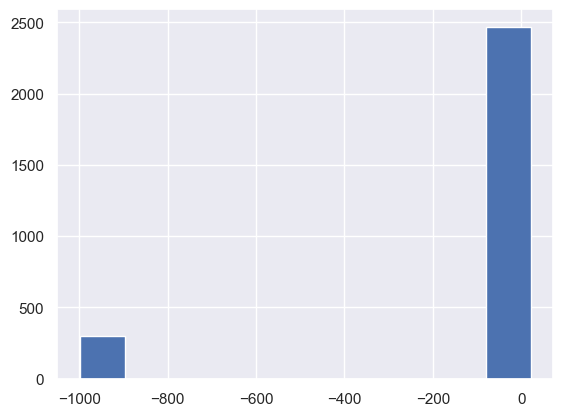

In [34]:
plt.hist(dataSet["mag_psf_u"])

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2492.]),
 array([-999.     , -897.06307, -795.12614, -693.18921, -591.25228,
        -489.31535, -387.37842, -285.44149, -183.50456,  -81.56763,
          20.3693 ]),
 <BarContainer object of 10 artists>)

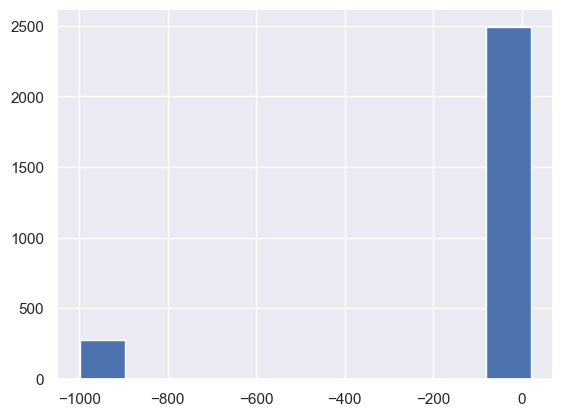

In [35]:
plt.hist(dataSet["mag_psf_J0378"])

(array([ 255.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2511.]),
 array([-999.     , -897.21091, -795.42182, -693.63273, -591.84364,
        -490.05455, -388.26546, -286.47637, -184.68728,  -82.89819,
          18.8909 ]),
 <BarContainer object of 10 artists>)

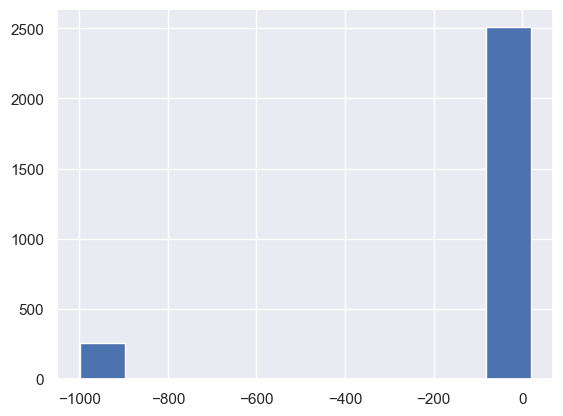

In [36]:
plt.hist(dataSet["mag_psf_J0395"])

(array([ 243.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2523.]),
 array([-999.      , -897.168835, -795.33767 , -693.506505, -591.67534 ,
        -489.844175, -388.01301 , -286.181845, -184.35068 ,  -82.519515,
          19.31165 ]),
 <BarContainer object of 10 artists>)

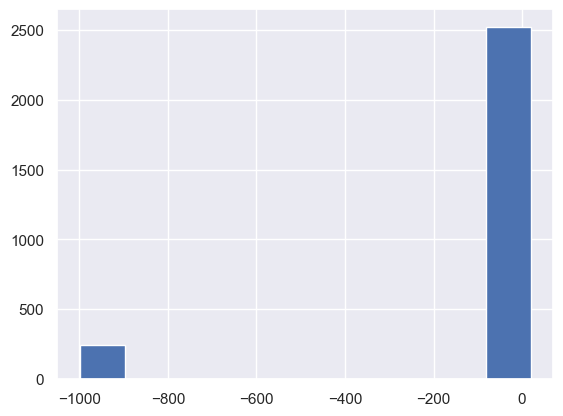

In [37]:
plt.hist(dataSet["mag_psf_J0410"])

(array([ 275.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2491.]),
 array([-999.      , -896.961879, -794.923758, -692.885637, -590.847516,
        -488.809395, -386.771274, -284.733153, -182.695032,  -80.656911,
          21.38121 ]),
 <BarContainer object of 10 artists>)

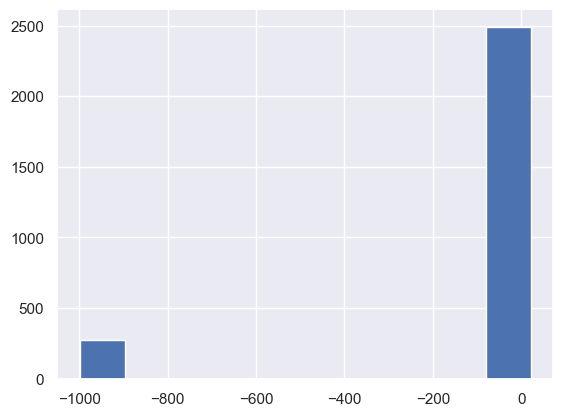

In [38]:
plt.hist(dataSet["mag_psf_J0430"])

(array([ 743.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2023.]),
 array([-999.     , -897.00934, -795.01868, -693.02802, -591.03736,
        -489.0467 , -387.05604, -285.06538, -183.07472,  -81.08406,
          20.9066 ]),
 <BarContainer object of 10 artists>)

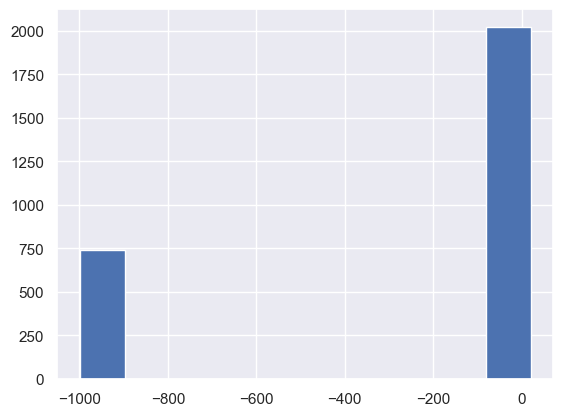

In [39]:
plt.hist(dataSet["mag_psf_g"])

(array([ 385.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2381.]),
 array([-999.      , -897.128572, -795.257144, -693.385716, -591.514288,
        -489.64286 , -387.771432, -285.900004, -184.028576,  -82.157148,
          19.71428 ]),
 <BarContainer object of 10 artists>)

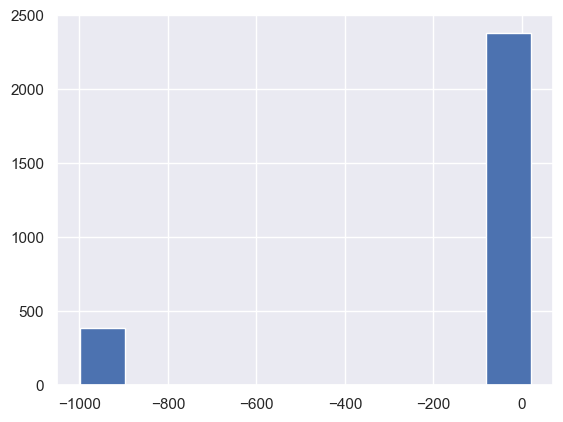

In [40]:
plt.hist(dataSet["mag_psf_J0515"])

(array([1314.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1452.]),
 array([-999.      , -897.227995, -795.45599 , -693.683985, -591.91198 ,
        -490.139975, -388.36797 , -286.595965, -184.82396 ,  -83.051955,
          18.72005 ]),
 <BarContainer object of 10 artists>)

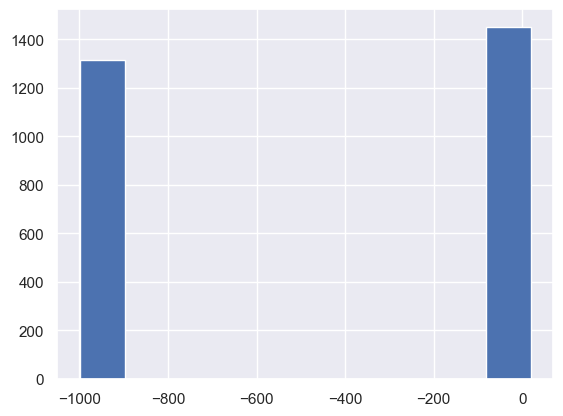

In [41]:
plt.hist(dataSet["mag_psf_r"])

(array([ 974.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1792.]),
 array([-999.      , -897.072537, -795.145074, -693.217611, -591.290148,
        -489.362685, -387.435222, -285.507759, -183.580296,  -81.652833,
          20.27463 ]),
 <BarContainer object of 10 artists>)

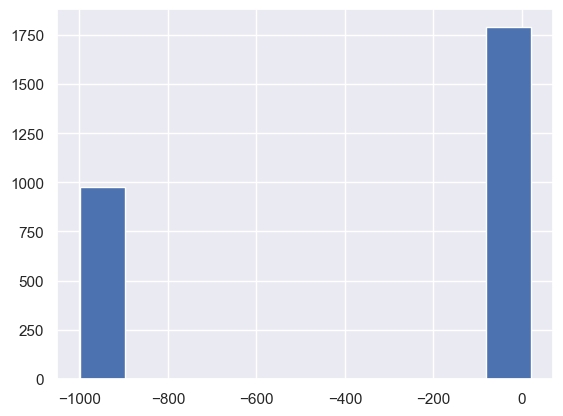

In [42]:
plt.hist(dataSet["mag_psf_J0660"])

In [68]:
pd.Series(dataSet["mag_psf_i"]).value_counts()

-999.00000    1499
 13.11133        1
 12.75404        1
 13.08702        1
 14.38997        1
              ... 
 14.24195        1
 13.28699        1
 14.13456        1
 14.02596        1
 14.73503        1
Name: mag_psf_i, Length: 1268, dtype: int64

(array([1499.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1267.]),
 array([-999.      , -897.167542, -795.335084, -693.502626, -591.670168,
        -489.83771 , -388.005252, -286.172794, -184.340336,  -82.507878,
          19.32458 ]),
 <BarContainer object of 10 artists>)

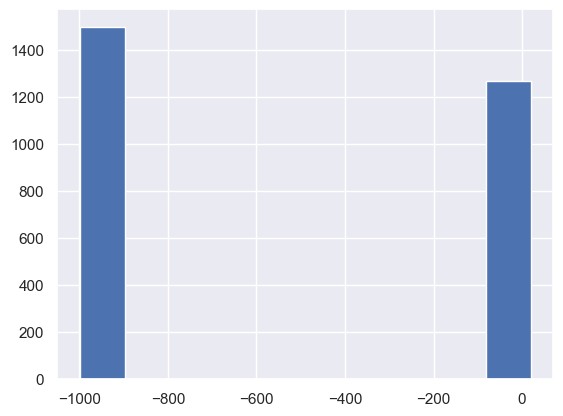

In [43]:
plt.hist(dataSet["mag_psf_i"])

(array([ 780.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1986.]),
 array([-999.      , -897.236579, -795.473158, -693.709737, -591.946316,
        -490.182895, -388.419474, -286.656053, -184.892632,  -83.129211,
          18.63421 ]),
 <BarContainer object of 10 artists>)

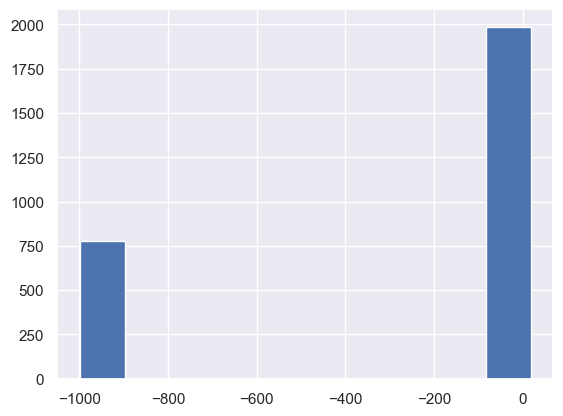

In [44]:
plt.hist(dataSet["mag_psf_J0861"])

(array([1266.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1500.]),
 array([-999.      , -897.150468, -795.300936, -693.451404, -591.601872,
        -489.75234 , -387.902808, -286.053276, -184.203744,  -82.354212,
          19.49532 ]),
 <BarContainer object of 10 artists>)

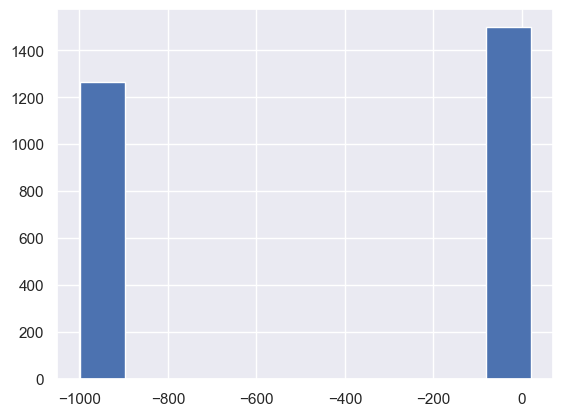

In [45]:
plt.hist(dataSet["mag_psf_z"])

In [15]:
for column in dataSet:
    print(column)

mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_r
mag_psf_J0660
mag_psf_i
mag_psf_J0861
mag_psf_z
Teffcnn
loggcnn
[Fe/H]cnn
[C/Fe]
[N/Fe]
[O/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[S/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Cu/Fe]


<AxesSubplot: xlabel='Teffcnn'>

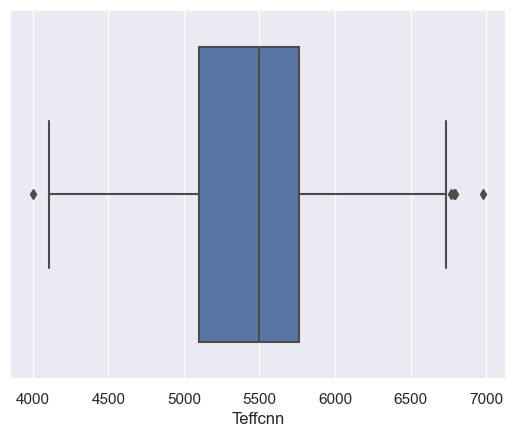

In [46]:
sns.boxplot(x = ydataSet["Teffcnn"])

<AxesSubplot: xlabel='loggcnn'>

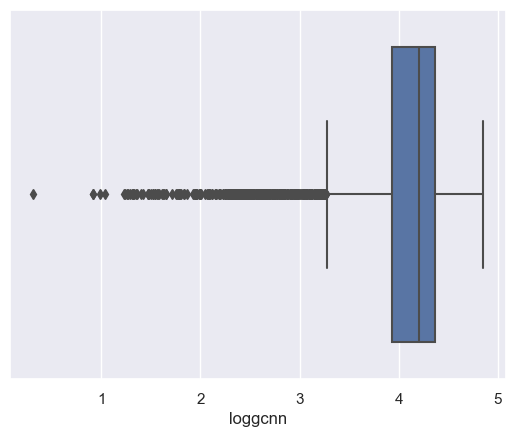

In [47]:
sns.boxplot(x = ydataSet["loggcnn"])

<AxesSubplot: xlabel='[Fe/H]cnn'>

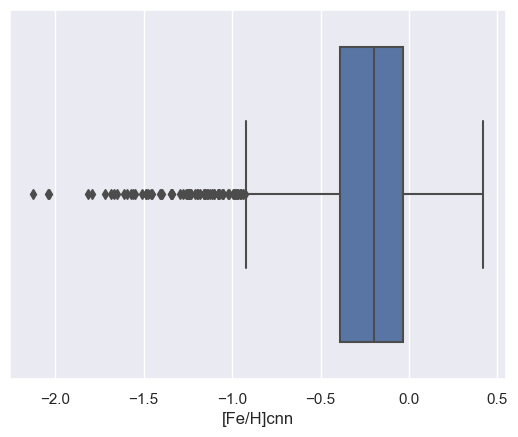

In [48]:
sns.boxplot(x = ydataSet["[Fe/H]cnn"])

<AxesSubplot: xlabel='[C/Fe]'>

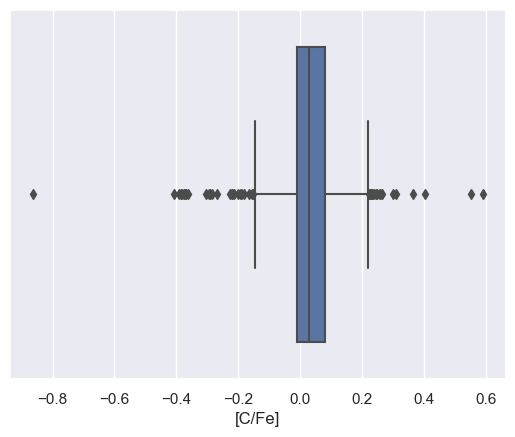

In [49]:
sns.boxplot(x = ydataSet["[C/Fe]"])

<AxesSubplot: xlabel='[N/Fe]'>

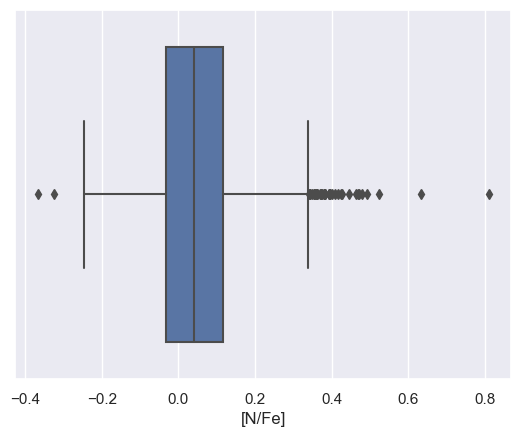

In [50]:
sns.boxplot(x = ydataSet["[N/Fe]"])

<AxesSubplot: xlabel='[Mg/Fe]'>

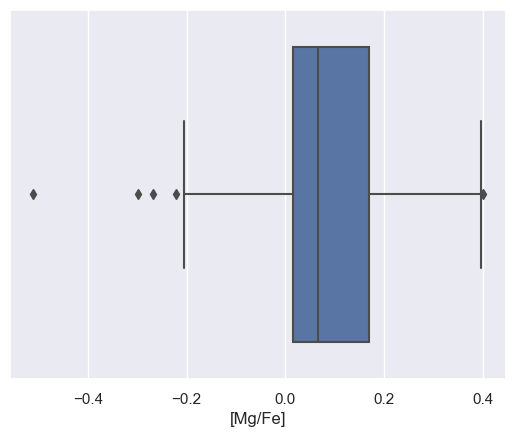

In [52]:
sns.boxplot(x = ydataSet["[Mg/Fe]"])

<AxesSubplot: xlabel='[Si/Fe]'>

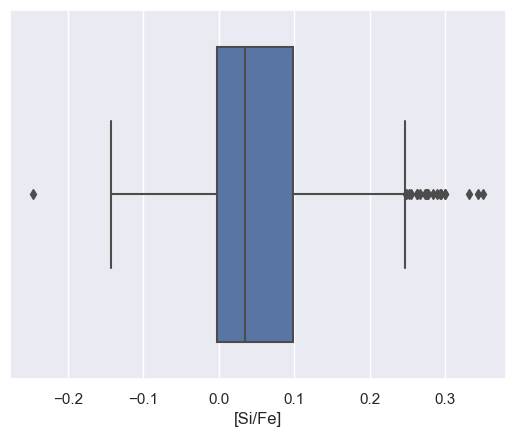

In [54]:
sns.boxplot(x = ydataSet["[Si/Fe]"])

<AxesSubplot: xlabel='[Ca/Fe]'>

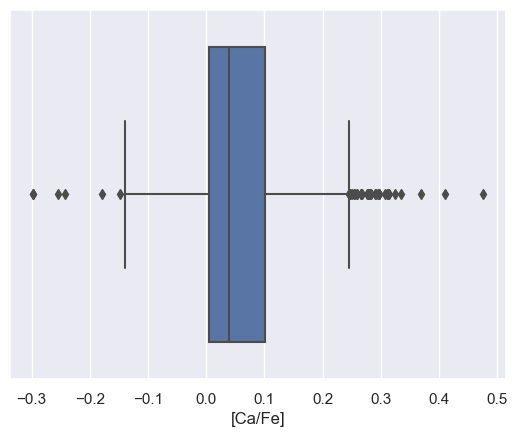

In [56]:
sns.boxplot(x = ydataSet["[Ca/Fe]"])

<AxesSubplot: xlabel='[Ni/Fe]'>

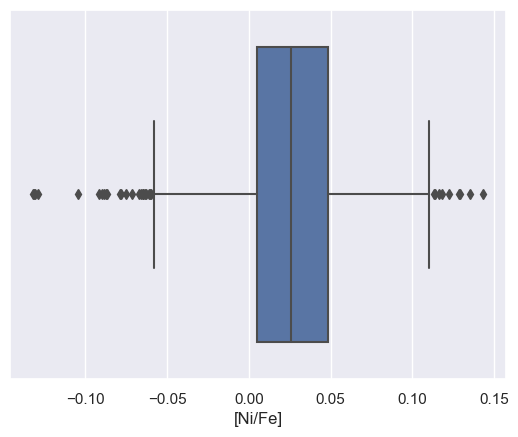

In [59]:
sns.boxplot(x = ydataSet["[Ni/Fe]"])

In [61]:
dataSet.max()

mag_psf_u          21.26215
mag_psf_J0378      20.36930
mag_psf_J0395      18.89090
mag_psf_J0410      19.31165
mag_psf_J0430      21.38121
mag_psf_g          20.90660
mag_psf_J0515      19.71428
mag_psf_r          18.72005
mag_psf_J0660      20.27463
mag_psf_i          19.32458
mag_psf_J0861      18.63421
mag_psf_z          19.49532
Teffcnn          6981.75000
loggcnn             4.85500
[Fe/H]cnn           0.42100
[C/Fe]              0.59101
[N/Fe]              0.80999
[O/Fe]              0.50661
[Mg/Fe]             0.40167
[Al/Fe]             0.70061
[Si/Fe]             0.35062
[S/Fe]              0.68966
[Ca/Fe]             0.47629
[Ti/Fe]             0.27530
[Cr/Fe]             0.38527
[Ni/Fe]             0.14348
[Cu/Fe]             1.24133
dtype: float64

In [62]:
dataSet.min()

mag_psf_u        -999.00000
mag_psf_J0378    -999.00000
mag_psf_J0395    -999.00000
mag_psf_J0410    -999.00000
mag_psf_J0430    -999.00000
mag_psf_g        -999.00000
mag_psf_J0515    -999.00000
mag_psf_r        -999.00000
mag_psf_J0660    -999.00000
mag_psf_i        -999.00000
mag_psf_J0861    -999.00000
mag_psf_z        -999.00000
Teffcnn          3998.52000
loggcnn             0.30800
[Fe/H]cnn          -2.12800
[C/Fe]             -0.86450
[N/Fe]             -0.36663
[O/Fe]          -9999.00000
[Mg/Fe]            -0.51214
[Al/Fe]         -9999.00000
[Si/Fe]            -0.24688
[S/Fe]          -9999.00000
[Ca/Fe]            -0.29836
[Ti/Fe]         -9999.00000
[Cr/Fe]         -9999.00000
[Ni/Fe]            -0.13236
[Cu/Fe]         -9999.00000
dtype: float64

In [72]:
Anas = dataSet.loc[(dataSet['Teffcnn']>3500) & 
                     (dataSet['Teffcnn']<7000) &
                     (dataSet['loggcnn']>3.5)]

In [73]:
dataSet

,mag_psf_u,mag_psf_J0378,mag_psf_J0395,mag_psf_J0410,mag_psf_J0430,mag_psf_g,mag_psf_J0515,mag_psf_r,mag_psf_J0660,mag_psf_i,...,[O/Fe],[Mg/Fe],[Al/Fe],[Si/Fe],[S/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Cu/Fe]
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,15.01453,14.64653,14.58852,14.11853,14.04753,13.76753,13.59553,13.30540,13.27640,13.15562,...,-9999.0,0.04902,-9999.0,-0.01506,-9999.0,0.13247,-9999.0,-9999.0,-0.00297,-9999.0
589602185,14.59844,14.24744,14.14344,13.59617,13.52717,13.21817,13.02917,12.77164,12.73564,-999.00000,...,-9999.0,0.01190,-9999.0,0.01152,-9999.0,-0.01401,-9999.0,-9999.0,0.03999,-9999.0
589602186,14.87307,14.48807,14.41307,13.89239,13.83339,13.54339,13.36439,13.09807,13.08907,12.96533,...,-9999.0,0.01171,-9999.0,0.02098,-9999.0,-0.00359,-9999.0,-9999.0,0.03895,-9999.0
589603005,15.21299,14.83499,14.72799,14.11035,14.01635,13.49035,13.26735,-999.00000,-999.00000,-999.00000,...,-9999.0,0.08874,-9999.0,0.01796,-9999.0,0.09741,-9999.0,-9999.0,0.02972,-9999.0
589603006,-999.00000,14.88259,14.69559,13.99569,13.86868,13.32628,13.10569,-999.00000,-999.00000,-999.00000,...,-9999.0,0.04586,-9999.0,-0.00632,-9999.0,0.04014,-9999.0,-9999.0,0.04143,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914244,13.70579,13.34379,13.26200,12.80611,12.74011,12.43811,12.26611,-999.00000,-999.00000,-999.00000,...,-9999.0,0.00444,-9999.0,0.00882,-9999.0,-0.00882,-9999.0,-9999.0,0.01199,-9999.0
695914245,14.74633,14.33324,14.30027,13.85634,13.79507,13.52007,13.33807,13.07952,13.05552,12.95067,...,-9999.0,0.21172,-9999.0,0.15608,-9999.0,0.20675,-9999.0,-9999.0,0.02067,-9999.0
695914246,14.59593,14.19393,14.15923,13.65657,13.60657,13.29057,13.11457,12.84430,12.81830,-999.00000,...,-9999.0,0.20603,-9999.0,0.10985,-9999.0,0.12273,-9999.0,-9999.0,0.02266,-9999.0


In [74]:
Anas

,mag_psf_u,mag_psf_J0378,mag_psf_J0395,mag_psf_J0410,mag_psf_J0430,mag_psf_g,mag_psf_J0515,mag_psf_r,mag_psf_J0660,mag_psf_i,...,[O/Fe],[Mg/Fe],[Al/Fe],[Si/Fe],[S/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Cu/Fe]
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,15.01453,14.64653,14.58852,14.11853,14.04753,13.76753,13.59553,13.30540,13.27640,13.15562,...,-9999.0,0.04902,-9999.0,-0.01506,-9999.0,0.13247,-9999.0,-9999.0,-0.00297,-9999.0
589602185,14.59844,14.24744,14.14344,13.59617,13.52717,13.21817,13.02917,12.77164,12.73564,-999.00000,...,-9999.0,0.01190,-9999.0,0.01152,-9999.0,-0.01401,-9999.0,-9999.0,0.03999,-9999.0
589602186,14.87307,14.48807,14.41307,13.89239,13.83339,13.54339,13.36439,13.09807,13.08907,12.96533,...,-9999.0,0.01171,-9999.0,0.02098,-9999.0,-0.00359,-9999.0,-9999.0,0.03895,-9999.0
589603006,-999.00000,14.88259,14.69559,13.99569,13.86868,13.32628,13.10569,-999.00000,-999.00000,-999.00000,...,-9999.0,0.04586,-9999.0,-0.00632,-9999.0,0.04014,-9999.0,-9999.0,0.04143,-9999.0
589603013,14.98025,14.58651,14.48225,13.92462,13.83693,13.49263,13.29493,-999.00000,-999.00000,-999.00000,...,-9999.0,0.04092,-9999.0,0.04061,-9999.0,-0.00892,-9999.0,-9999.0,0.03992,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914244,13.70579,13.34379,13.26200,12.80611,12.74011,12.43811,12.26611,-999.00000,-999.00000,-999.00000,...,-9999.0,0.00444,-9999.0,0.00882,-9999.0,-0.00882,-9999.0,-9999.0,0.01199,-9999.0
695914245,14.74633,14.33324,14.30027,13.85634,13.79507,13.52007,13.33807,13.07952,13.05552,12.95067,...,-9999.0,0.21172,-9999.0,0.15608,-9999.0,0.20675,-9999.0,-9999.0,0.02067,-9999.0
695914246,14.59593,14.19393,14.15923,13.65657,13.60657,13.29057,13.11457,12.84430,12.81830,-999.00000,...,-9999.0,0.20603,-9999.0,0.10985,-9999.0,0.12273,-9999.0,-9999.0,0.02266,-9999.0


In [79]:
fig = px.scatter(dataSet, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[8000, 3500])
fig.update_yaxes(range=[5, 0])
fig.show()

In [80]:
fig = px.scatter(Anas, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[8000, 3500])
fig.update_yaxes(range=[5, 0])
fig.show()

##### Treinando TEFF

In [ ]:
xtrain = dataSet.loc[(dataSet['Teffcnn']>3500) & 
                     (dataSet['Teffcnn']<7000) &
                     (dataSet['loggcnn']>3.5)]

In [33]:
ytrain = dataSet.loc[(csv['SNRg_LAMOST']>10) & 
                     (csv['SNRi_LAMOST']>10) & 
                     (csv['SNRz_LAMOST']>10) & 
                     (csv['SNRr_LAMOST']>10) & 
                     (csv['teff_LAMOST']>4000) & 
                     (csv['teff_LAMOST']<7000) &
                     (csv['logg_training']>3.5),
                     ['teff_training']]

In [ ]:
#sample_weights=generate_weights(np.array(Y_train),bins=20)#The 'sample_weights' and the 'train_y' should have the same shape.

In [48]:
xtrain.shape

(47006, 12)

In [141]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [35]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 12 stellar filters from splus; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'teff_training')

In [36]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [37]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [38]:
bs = 3000

In [39]:
modelteff = baseline_model_teff()

In [40]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modelteff.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
12/12 - 1s - loss: 0.1430 - val_loss: 0.1431 - 603ms/epoch - 50ms/step
Epoch 2/30
12/12 - 0s - loss: 0.1410 - val_loss: 0.1413 - 81ms/epoch - 7ms/step
Epoch 3/30
12/12 - 0s - loss: 0.1392 - val_loss: 0.1397 - 80ms/epoch - 7ms/step
Epoch 4/30
12/12 - 0s - loss: 0.1374 - val_loss: 0.1378 - 77ms/epoch - 6ms/step
Epoch 5/30
12/12 - 0s - loss: 0.1355 - val_loss: 0.1362 - 82ms/epoch - 7ms/step
Epoch 6/30
12/12 - 0s - loss: 0.1337 - val_loss: 0.1345 - 90ms/epoch - 8ms/step
Epoch 7/30
12/12 - 0s - loss: 0.1320 - val_loss: 0.1330 - 81ms/epoch - 7ms/step
Epoch 8/30
12/12 - 0s - loss: 0.1304 - val_loss: 0.1312 - 78ms/epoch - 7ms/step
Epoch 9/30
12/12 - 0s - loss: 0.1286 - val_loss: 0.1293 - 82ms/epoch - 7ms/step
Epoch 10/30
12/12 - 0s - loss: 0.1266 - val_loss: 0.1270 - 80ms/epoch - 7ms/step
Epoch 11/30
12/12 - 0s - loss: 0.1242 - val_loss: 0.1246 - 89ms/epoch - 7ms/step
Epoch 12/30
12/12 - 0s - loss: 0.1214 - val_loss: 0.1213 - 86ms/epoch - 7ms/step
Epoch 13/30
12/12 - 0s - loss: 0.11

In [41]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyteff = modelteff.fit(X_train, Y_train, epochs = 2500, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modelteff.save('model/model_lamost_teff_V.h5') 

Epoch 1/2500
12/12 - 0s - loss: 0.0188 - val_loss: 0.0182 - 151ms/epoch - 13ms/step
Epoch 2/2500
12/12 - 0s - loss: 0.0185 - val_loss: 0.0180 - 89ms/epoch - 7ms/step
Epoch 3/2500
12/12 - 0s - loss: 0.0183 - val_loss: 0.0175 - 89ms/epoch - 7ms/step
Epoch 4/2500
12/12 - 0s - loss: 0.0179 - val_loss: 0.0174 - 89ms/epoch - 7ms/step
Epoch 5/2500
12/12 - 0s - loss: 0.0177 - val_loss: 0.0174 - 89ms/epoch - 7ms/step
Epoch 6/2500
12/12 - 0s - loss: 0.0176 - val_loss: 0.0172 - 86ms/epoch - 7ms/step
Epoch 7/2500
12/12 - 0s - loss: 0.0174 - val_loss: 0.0169 - 90ms/epoch - 7ms/step
Epoch 8/2500
12/12 - 0s - loss: 0.0173 - val_loss: 0.0168 - 86ms/epoch - 7ms/step
Epoch 9/2500
12/12 - 0s - loss: 0.0171 - val_loss: 0.0168 - 88ms/epoch - 7ms/step
Epoch 10/2500
12/12 - 0s - loss: 0.0170 - val_loss: 0.0166 - 95ms/epoch - 8ms/step
Epoch 11/2500
12/12 - 0s - loss: 0.0170 - val_loss: 0.0166 - 98ms/epoch - 8ms/step
Epoch 12/2500
12/12 - 0s - loss: 0.0169 - val_loss: 0.0164 - 90ms/epoch - 8ms/step
Epoch 13/25

Epoch 100/2500
12/12 - 0s - loss: 0.0141 - val_loss: 0.0142 - 100ms/epoch - 8ms/step
Epoch 101/2500
12/12 - 0s - loss: 0.0141 - val_loss: 0.0140 - 95ms/epoch - 8ms/step
Epoch 102/2500
12/12 - 0s - loss: 0.0141 - val_loss: 0.0139 - 93ms/epoch - 8ms/step
Epoch 103/2500
12/12 - 0s - loss: 0.0141 - val_loss: 0.0138 - 95ms/epoch - 8ms/step
Epoch 104/2500
12/12 - 0s - loss: 0.0140 - val_loss: 0.0138 - 96ms/epoch - 8ms/step
Epoch 105/2500
12/12 - 0s - loss: 0.0140 - val_loss: 0.0138 - 97ms/epoch - 8ms/step
Epoch 106/2500
12/12 - 0s - loss: 0.0140 - val_loss: 0.0138 - 96ms/epoch - 8ms/step
Epoch 107/2500
12/12 - 0s - loss: 0.0140 - val_loss: 0.0143 - 92ms/epoch - 8ms/step
Epoch 108/2500
12/12 - 0s - loss: 0.0142 - val_loss: 0.0139 - 92ms/epoch - 8ms/step
Epoch 109/2500
12/12 - 0s - loss: 0.0141 - val_loss: 0.0137 - 88ms/epoch - 7ms/step
Epoch 110/2500
12/12 - 0s - loss: 0.0139 - val_loss: 0.0137 - 92ms/epoch - 8ms/step
Epoch 111/2500
12/12 - 0s - loss: 0.0139 - val_loss: 0.0138 - 92ms/epoch - 

Epoch 198/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0129 - 86ms/epoch - 7ms/step
Epoch 199/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0129 - 91ms/epoch - 8ms/step
Epoch 200/2500
12/12 - 0s - loss: 0.0132 - val_loss: 0.0129 - 94ms/epoch - 8ms/step
Epoch 201/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0128 - 88ms/epoch - 7ms/step
Epoch 202/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0128 - 86ms/epoch - 7ms/step
Epoch 203/2500
12/12 - 0s - loss: 0.0130 - val_loss: 0.0128 - 90ms/epoch - 8ms/step
Epoch 204/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0129 - 91ms/epoch - 8ms/step
Epoch 205/2500
12/12 - 0s - loss: 0.0130 - val_loss: 0.0128 - 84ms/epoch - 7ms/step
Epoch 206/2500
12/12 - 0s - loss: 0.0130 - val_loss: 0.0129 - 88ms/epoch - 7ms/step
Epoch 207/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0128 - 98ms/epoch - 8ms/step
Epoch 208/2500
12/12 - 0s - loss: 0.0131 - val_loss: 0.0128 - 107ms/epoch - 9ms/step
Epoch 209/2500
12/12 - 0s - loss: 0.0130 - val_loss: 0.0127 - 104ms/epoch -

Epoch 296/2500
12/12 - 0s - loss: 0.0125 - val_loss: 0.0122 - 88ms/epoch - 7ms/step
Epoch 297/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0122 - 88ms/epoch - 7ms/step
Epoch 298/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0122 - 86ms/epoch - 7ms/step
Epoch 299/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0124 - 85ms/epoch - 7ms/step
Epoch 300/2500
12/12 - 0s - loss: 0.0125 - val_loss: 0.0123 - 86ms/epoch - 7ms/step
Epoch 301/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0122 - 87ms/epoch - 7ms/step
Epoch 302/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0122 - 91ms/epoch - 8ms/step
Epoch 303/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0123 - 92ms/epoch - 8ms/step
Epoch 304/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0121 - 92ms/epoch - 8ms/step
Epoch 305/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0124 - 89ms/epoch - 7ms/step
Epoch 306/2500
12/12 - 0s - loss: 0.0125 - val_loss: 0.0122 - 91ms/epoch - 8ms/step
Epoch 307/2500
12/12 - 0s - loss: 0.0124 - val_loss: 0.0121 - 91ms/epoch - 8

Epoch 394/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0117 - 82ms/epoch - 7ms/step
Epoch 395/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0117 - 81ms/epoch - 7ms/step
Epoch 396/2500
12/12 - 0s - loss: 0.0119 - val_loss: 0.0116 - 81ms/epoch - 7ms/step
Epoch 397/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0116 - 82ms/epoch - 7ms/step
Epoch 398/2500
12/12 - 0s - loss: 0.0119 - val_loss: 0.0118 - 82ms/epoch - 7ms/step
Epoch 399/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0120 - 81ms/epoch - 7ms/step
Epoch 400/2500
12/12 - 0s - loss: 0.0121 - val_loss: 0.0116 - 82ms/epoch - 7ms/step
Epoch 401/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0116 - 85ms/epoch - 7ms/step
Epoch 402/2500
12/12 - 0s - loss: 0.0120 - val_loss: 0.0118 - 80ms/epoch - 7ms/step
Epoch 403/2500
12/12 - 0s - loss: 0.0119 - val_loss: 0.0116 - 81ms/epoch - 7ms/step
Epoch 404/2500
12/12 - 0s - loss: 0.0119 - val_loss: 0.0116 - 83ms/epoch - 7ms/step
Epoch 405/2500
12/12 - 0s - loss: 0.0119 - val_loss: 0.0116 - 82ms/epoch - 7

Epoch 492/2500
12/12 - 0s - loss: 0.0116 - val_loss: 0.0117 - 110ms/epoch - 9ms/step
Epoch 493/2500
12/12 - 0s - loss: 0.0116 - val_loss: 0.0113 - 100ms/epoch - 8ms/step
Epoch 494/2500
12/12 - 0s - loss: 0.0116 - val_loss: 0.0113 - 91ms/epoch - 8ms/step
Epoch 495/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0112 - 86ms/epoch - 7ms/step
Epoch 496/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0113 - 84ms/epoch - 7ms/step
Epoch 497/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0112 - 77ms/epoch - 6ms/step
Epoch 498/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0113 - 79ms/epoch - 7ms/step
Epoch 499/2500
12/12 - 0s - loss: 0.0116 - val_loss: 0.0115 - 82ms/epoch - 7ms/step
Epoch 500/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0114 - 86ms/epoch - 7ms/step
Epoch 501/2500
12/12 - 0s - loss: 0.0116 - val_loss: 0.0113 - 82ms/epoch - 7ms/step
Epoch 502/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0112 - 78ms/epoch - 7ms/step
Epoch 503/2500
12/12 - 0s - loss: 0.0115 - val_loss: 0.0112 - 79ms/epoch -

Epoch 590/2500
12/12 - 0s - loss: 0.0112 - val_loss: 0.0109 - 86ms/epoch - 7ms/step
Epoch 591/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0110 - 95ms/epoch - 8ms/step
Epoch 592/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0109 - 92ms/epoch - 8ms/step
Epoch 593/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0109 - 94ms/epoch - 8ms/step
Epoch 594/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0110 - 97ms/epoch - 8ms/step
Epoch 595/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0109 - 144ms/epoch - 12ms/step
Epoch 596/2500
12/12 - 0s - loss: 0.0112 - val_loss: 0.0109 - 84ms/epoch - 7ms/step
Epoch 597/2500
12/12 - 0s - loss: 0.0112 - val_loss: 0.0109 - 81ms/epoch - 7ms/step
Epoch 598/2500
12/12 - 0s - loss: 0.0112 - val_loss: 0.0110 - 78ms/epoch - 7ms/step
Epoch 599/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0108 - 87ms/epoch - 7ms/step
Epoch 600/2500
12/12 - 0s - loss: 0.0112 - val_loss: 0.0109 - 86ms/epoch - 7ms/step
Epoch 601/2500
12/12 - 0s - loss: 0.0111 - val_loss: 0.0109 - 85ms/epoch -

Epoch 688/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0110 - 86ms/epoch - 7ms/step
Epoch 689/2500
12/12 - 0s - loss: 0.0110 - val_loss: 0.0105 - 85ms/epoch - 7ms/step
Epoch 690/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0106 - 87ms/epoch - 7ms/step
Epoch 691/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0105 - 85ms/epoch - 7ms/step
Epoch 692/2500
12/12 - 0s - loss: 0.0109 - val_loss: 0.0109 - 87ms/epoch - 7ms/step
Epoch 693/2500
12/12 - 0s - loss: 0.0109 - val_loss: 0.0112 - 89ms/epoch - 7ms/step
Epoch 694/2500
12/12 - 0s - loss: 0.0110 - val_loss: 0.0107 - 85ms/epoch - 7ms/step
Epoch 695/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0105 - 88ms/epoch - 7ms/step
Epoch 696/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0105 - 90ms/epoch - 7ms/step
Epoch 697/2500
12/12 - 0s - loss: 0.0109 - val_loss: 0.0106 - 86ms/epoch - 7ms/step
Epoch 698/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0106 - 92ms/epoch - 8ms/step
Epoch 699/2500
12/12 - 0s - loss: 0.0108 - val_loss: 0.0105 - 87ms/epoch - 7

Epoch 786/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0103 - 96ms/epoch - 8ms/step
Epoch 787/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0103 - 96ms/epoch - 8ms/step
Epoch 788/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0102 - 92ms/epoch - 8ms/step
Epoch 789/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0102 - 97ms/epoch - 8ms/step
Epoch 790/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0103 - 95ms/epoch - 8ms/step
Epoch 791/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0102 - 104ms/epoch - 9ms/step
Epoch 792/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0101 - 100ms/epoch - 8ms/step
Epoch 793/2500
12/12 - 0s - loss: 0.0104 - val_loss: 0.0103 - 96ms/epoch - 8ms/step
Epoch 794/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0103 - 99ms/epoch - 8ms/step
Epoch 795/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0102 - 89ms/epoch - 7ms/step
Epoch 796/2500
12/12 - 0s - loss: 0.0105 - val_loss: 0.0102 - 88ms/epoch - 7ms/step
Epoch 797/2500
12/12 - 0s - loss: 0.0104 - val_loss: 0.0102 - 92ms/epoch -

Epoch 884/2500
12/12 - 0s - loss: 0.0103 - val_loss: 0.0100 - 106ms/epoch - 9ms/step
Epoch 885/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0101 - 103ms/epoch - 9ms/step
Epoch 886/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0100 - 98ms/epoch - 8ms/step
Epoch 887/2500
12/12 - 0s - loss: 0.0103 - val_loss: 0.0101 - 93ms/epoch - 8ms/step
Epoch 888/2500
12/12 - 0s - loss: 0.0103 - val_loss: 0.0100 - 104ms/epoch - 9ms/step
Epoch 889/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0101 - 105ms/epoch - 9ms/step
Epoch 890/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0099 - 99ms/epoch - 8ms/step
Epoch 891/2500
12/12 - 0s - loss: 0.0101 - val_loss: 0.0099 - 88ms/epoch - 7ms/step
Epoch 892/2500
12/12 - 0s - loss: 0.0101 - val_loss: 0.0099 - 89ms/epoch - 7ms/step
Epoch 893/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0100 - 91ms/epoch - 8ms/step
Epoch 894/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0100 - 92ms/epoch - 8ms/step
Epoch 895/2500
12/12 - 0s - loss: 0.0102 - val_loss: 0.0098 - 82ms/epoch

Epoch 982/2500
12/12 - 0s - loss: 0.0100 - val_loss: 0.0099 - 82ms/epoch - 7ms/step
Epoch 983/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0097 - 77ms/epoch - 6ms/step
Epoch 984/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0097 - 85ms/epoch - 7ms/step
Epoch 985/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0098 - 79ms/epoch - 7ms/step
Epoch 986/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0097 - 81ms/epoch - 7ms/step
Epoch 987/2500
12/12 - 0s - loss: 0.0098 - val_loss: 0.0096 - 80ms/epoch - 7ms/step
Epoch 988/2500
12/12 - 0s - loss: 0.0098 - val_loss: 0.0096 - 84ms/epoch - 7ms/step
Epoch 989/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0096 - 94ms/epoch - 8ms/step
Epoch 990/2500
12/12 - 0s - loss: 0.0101 - val_loss: 0.0098 - 101ms/epoch - 8ms/step
Epoch 991/2500
12/12 - 0s - loss: 0.0101 - val_loss: 0.0097 - 94ms/epoch - 8ms/step
Epoch 992/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0097 - 96ms/epoch - 8ms/step
Epoch 993/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0096 - 96ms/epoch - 

Epoch 1079/2500
12/12 - 0s - loss: 0.0099 - val_loss: 0.0095 - 83ms/epoch - 7ms/step
Epoch 1080/2500
12/12 - 0s - loss: 0.0097 - val_loss: 0.0095 - 84ms/epoch - 7ms/step
Epoch 1081/2500
12/12 - 0s - loss: 0.0097 - val_loss: 0.0094 - 82ms/epoch - 7ms/step
Epoch 1082/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 79ms/epoch - 7ms/step
Epoch 1083/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 81ms/epoch - 7ms/step
Epoch 1084/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 79ms/epoch - 7ms/step
Epoch 1085/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 80ms/epoch - 7ms/step
Epoch 1086/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0095 - 114ms/epoch - 10ms/step
Epoch 1087/2500
12/12 - 0s - loss: 0.0097 - val_loss: 0.0094 - 79ms/epoch - 7ms/step
Epoch 1088/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 80ms/epoch - 7ms/step
Epoch 1089/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0095 - 80ms/epoch - 7ms/step
Epoch 1090/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0094 - 

Epoch 1176/2500
12/12 - 0s - loss: 0.0095 - val_loss: 0.0092 - 86ms/epoch - 7ms/step
Epoch 1177/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 79ms/epoch - 7ms/step
Epoch 1178/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 87ms/epoch - 7ms/step
Epoch 1179/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0093 - 92ms/epoch - 8ms/step
Epoch 1180/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 88ms/epoch - 7ms/step
Epoch 1181/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 85ms/epoch - 7ms/step
Epoch 1182/2500
12/12 - 0s - loss: 0.0095 - val_loss: 0.0092 - 83ms/epoch - 7ms/step
Epoch 1183/2500
12/12 - 0s - loss: 0.0096 - val_loss: 0.0092 - 83ms/epoch - 7ms/step
Epoch 1184/2500
12/12 - 0s - loss: 0.0097 - val_loss: 0.0093 - 80ms/epoch - 7ms/step
Epoch 1185/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 81ms/epoch - 7ms/step
Epoch 1186/2500
12/12 - 0s - loss: 0.0093 - val_loss: 0.0094 - 80ms/epoch - 7ms/step
Epoch 1187/2500
12/12 - 0s - loss: 0.0094 - val_loss: 0.0092 - 84

Epoch 1273/2500
12/12 - 0s - loss: 0.0093 - val_loss: 0.0091 - 75ms/epoch - 6ms/step
Epoch 1274/2500
12/12 - 0s - loss: 0.0093 - val_loss: 0.0098 - 78ms/epoch - 7ms/step
Epoch 1275/2500
12/12 - 0s - loss: 0.0095 - val_loss: 0.0091 - 78ms/epoch - 7ms/step
Epoch 1276/2500
12/12 - 0s - loss: 0.0093 - val_loss: 0.0092 - 75ms/epoch - 6ms/step
Epoch 1277/2500
12/12 - 0s - loss: 0.0092 - val_loss: 0.0090 - 77ms/epoch - 6ms/step
Epoch 1278/2500
12/12 - 0s - loss: 0.0091 - val_loss: 0.0090 - 77ms/epoch - 6ms/step
Epoch 1279/2500
12/12 - 0s - loss: 0.0093 - val_loss: 0.0090 - 78ms/epoch - 7ms/step
Epoch 1280/2500
12/12 - 0s - loss: 0.0091 - val_loss: 0.0090 - 78ms/epoch - 7ms/step
Epoch 1281/2500
12/12 - 0s - loss: 0.0092 - val_loss: 0.0090 - 75ms/epoch - 6ms/step
Epoch 1282/2500
12/12 - 0s - loss: 0.0092 - val_loss: 0.0093 - 78ms/epoch - 7ms/step
Epoch 1283/2500
12/12 - 0s - loss: 0.0092 - val_loss: 0.0090 - 77ms/epoch - 6ms/step
Epoch 1284/2500
12/12 - 0s - loss: 0.0092 - val_loss: 0.0090 - 76

Epoch 1370/2500
12/12 - 0s - loss: 0.0091 - val_loss: 0.0088 - 94ms/epoch - 8ms/step
Epoch 1371/2500
12/12 - 0s - loss: 0.0089 - val_loss: 0.0088 - 91ms/epoch - 8ms/step
Epoch 1372/2500
12/12 - 0s - loss: 0.0089 - val_loss: 0.0088 - 90ms/epoch - 7ms/step
Epoch 1373/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0088 - 88ms/epoch - 7ms/step
Epoch 1374/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0089 - 93ms/epoch - 8ms/step
Epoch 1375/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0089 - 91ms/epoch - 8ms/step
Epoch 1376/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0088 - 90ms/epoch - 8ms/step
Epoch 1377/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0088 - 92ms/epoch - 8ms/step
Epoch 1378/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0088 - 90ms/epoch - 7ms/step
Epoch 1379/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0090 - 89ms/epoch - 7ms/step
Epoch 1380/2500
12/12 - 0s - loss: 0.0090 - val_loss: 0.0089 - 87ms/epoch - 7ms/step
Epoch 1381/2500
12/12 - 0s - loss: 0.0091 - val_loss: 0.0089 - 88

Epoch 1467/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 89ms/epoch - 7ms/step
Epoch 1468/2500
12/12 - 0s - loss: 0.0089 - val_loss: 0.0088 - 88ms/epoch - 7ms/step
Epoch 1469/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0086 - 90ms/epoch - 7ms/step
Epoch 1470/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 94ms/epoch - 8ms/step
Epoch 1471/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 89ms/epoch - 7ms/step
Epoch 1472/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 90ms/epoch - 8ms/step
Epoch 1473/2500
12/12 - 0s - loss: 0.0089 - val_loss: 0.0089 - 90ms/epoch - 8ms/step
Epoch 1474/2500
12/12 - 0s - loss: 0.0089 - val_loss: 0.0087 - 92ms/epoch - 8ms/step
Epoch 1475/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0086 - 90ms/epoch - 8ms/step
Epoch 1476/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 89ms/epoch - 7ms/step
Epoch 1477/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0089 - 91ms/epoch - 8ms/step
Epoch 1478/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0087 - 89

Epoch 1564/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 79ms/epoch - 7ms/step
Epoch 1565/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0086 - 99ms/epoch - 8ms/step
Epoch 1566/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 96ms/epoch - 8ms/step
Epoch 1567/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0088 - 93ms/epoch - 8ms/step
Epoch 1568/2500
12/12 - 0s - loss: 0.0088 - val_loss: 0.0085 - 94ms/epoch - 8ms/step
Epoch 1569/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 91ms/epoch - 8ms/step
Epoch 1570/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 90ms/epoch - 8ms/step
Epoch 1571/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0085 - 94ms/epoch - 8ms/step
Epoch 1572/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0085 - 93ms/epoch - 8ms/step
Epoch 1573/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0085 - 91ms/epoch - 8ms/step
Epoch 1574/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0085 - 92ms/epoch - 8ms/step
Epoch 1575/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0086 - 11

Epoch 1661/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0084 - 81ms/epoch - 7ms/step
Epoch 1662/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0086 - 79ms/epoch - 7ms/step
Epoch 1663/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 79ms/epoch - 7ms/step
Epoch 1664/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0084 - 79ms/epoch - 7ms/step
Epoch 1665/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0084 - 81ms/epoch - 7ms/step
Epoch 1666/2500
12/12 - 0s - loss: 0.0087 - val_loss: 0.0085 - 85ms/epoch - 7ms/step
Epoch 1667/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0085 - 85ms/epoch - 7ms/step
Epoch 1668/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0084 - 79ms/epoch - 7ms/step
Epoch 1669/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0085 - 82ms/epoch - 7ms/step
Epoch 1670/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0084 - 81ms/epoch - 7ms/step
Epoch 1671/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0084 - 81ms/epoch - 7ms/step
Epoch 1672/2500
12/12 - 0s - loss: 0.0086 - val_loss: 0.0087 - 94

Epoch 1758/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0083 - 80ms/epoch - 7ms/step
Epoch 1759/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 82ms/epoch - 7ms/step
Epoch 1760/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 82ms/epoch - 7ms/step
Epoch 1761/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0084 - 88ms/epoch - 7ms/step
Epoch 1762/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 82ms/epoch - 7ms/step
Epoch 1763/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 78ms/epoch - 7ms/step
Epoch 1764/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0084 - 79ms/epoch - 7ms/step
Epoch 1765/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 78ms/epoch - 7ms/step
Epoch 1766/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 78ms/epoch - 7ms/step
Epoch 1767/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0083 - 79ms/epoch - 7ms/step
Epoch 1768/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 78ms/epoch - 7ms/step
Epoch 1769/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0083 - 81

12/12 - 0s - loss: 0.0085 - val_loss: 0.0082 - 105ms/epoch - 9ms/step
Epoch 1855/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0083 - 95ms/epoch - 8ms/step
Epoch 1856/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0083 - 91ms/epoch - 8ms/step
Epoch 1857/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0083 - 105ms/epoch - 9ms/step
Epoch 1858/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 91ms/epoch - 8ms/step
Epoch 1859/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0084 - 87ms/epoch - 7ms/step
Epoch 1860/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0082 - 87ms/epoch - 7ms/step
Epoch 1861/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0088 - 85ms/epoch - 7ms/step
Epoch 1862/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0083 - 88ms/epoch - 7ms/step
Epoch 1863/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 83ms/epoch - 7ms/step
Epoch 1864/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 81ms/epoch - 7ms/step
Epoch 1865/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 82ms/epoch - 7ms

Epoch 1951/2500
12/12 - 0s - loss: 0.0085 - val_loss: 0.0086 - 94ms/epoch - 8ms/step
Epoch 1952/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0081 - 89ms/epoch - 7ms/step
Epoch 1953/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0083 - 80ms/epoch - 7ms/step
Epoch 1954/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0081 - 78ms/epoch - 7ms/step
Epoch 1955/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0081 - 77ms/epoch - 6ms/step
Epoch 1956/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0081 - 80ms/epoch - 7ms/step
Epoch 1957/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0081 - 79ms/epoch - 7ms/step
Epoch 1958/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 80ms/epoch - 7ms/step
Epoch 1959/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0083 - 84ms/epoch - 7ms/step
Epoch 1960/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0081 - 81ms/epoch - 7ms/step
Epoch 1961/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0082 - 82ms/epoch - 7ms/step
Epoch 1962/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0081 - 81

Epoch 2048/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 96ms/epoch - 8ms/step
Epoch 2049/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 91ms/epoch - 8ms/step
Epoch 2050/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 94ms/epoch - 8ms/step
Epoch 2051/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0080 - 91ms/epoch - 8ms/step
Epoch 2052/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 93ms/epoch - 8ms/step
Epoch 2053/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0081 - 93ms/epoch - 8ms/step
Epoch 2054/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0083 - 92ms/epoch - 8ms/step
Epoch 2055/2500
12/12 - 0s - loss: 0.0084 - val_loss: 0.0084 - 93ms/epoch - 8ms/step
Epoch 2056/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0083 - 92ms/epoch - 8ms/step
Epoch 2057/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0081 - 93ms/epoch - 8ms/step
Epoch 2058/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0081 - 93ms/epoch - 8ms/step
Epoch 2059/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0083 - 92

Epoch 2145/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 92ms/epoch - 8ms/step
Epoch 2146/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0080 - 92ms/epoch - 8ms/step
Epoch 2147/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0081 - 127ms/epoch - 11ms/step
Epoch 2148/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0079 - 136ms/epoch - 11ms/step
Epoch 2149/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 107ms/epoch - 9ms/step
Epoch 2150/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 98ms/epoch - 8ms/step
Epoch 2151/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0079 - 90ms/epoch - 7ms/step
Epoch 2152/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0087 - 93ms/epoch - 8ms/step
Epoch 2153/2500
12/12 - 0s - loss: 0.0083 - val_loss: 0.0082 - 93ms/epoch - 8ms/step
Epoch 2154/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080 - 96ms/epoch - 8ms/step
Epoch 2155/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0081 - 92ms/epoch - 8ms/step
Epoch 2156/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0080

Epoch 2242/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0078 - 91ms/epoch - 8ms/step
Epoch 2243/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0079 - 94ms/epoch - 8ms/step
Epoch 2244/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0080 - 95ms/epoch - 8ms/step
Epoch 2245/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0079 - 91ms/epoch - 8ms/step
Epoch 2246/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0080 - 94ms/epoch - 8ms/step
Epoch 2247/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0079 - 94ms/epoch - 8ms/step
Epoch 2248/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0078 - 92ms/epoch - 8ms/step
Epoch 2249/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0079 - 94ms/epoch - 8ms/step
Epoch 2250/2500
12/12 - 0s - loss: 0.0082 - val_loss: 0.0079 - 95ms/epoch - 8ms/step
Epoch 2251/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0080 - 97ms/epoch - 8ms/step
Epoch 2252/2500
12/12 - 0s - loss: 0.0081 - val_loss: 0.0081 - 100ms/epoch - 8ms/step
Epoch 2253/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0078 - 1

Epoch 2339/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0078 - 79ms/epoch - 7ms/step
Epoch 2340/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0080 - 83ms/epoch - 7ms/step
Epoch 2341/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0078 - 80ms/epoch - 7ms/step
Epoch 2342/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0078 - 84ms/epoch - 7ms/step
Epoch 2343/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0079 - 80ms/epoch - 7ms/step
Epoch 2344/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0079 - 82ms/epoch - 7ms/step
Epoch 2345/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0077 - 80ms/epoch - 7ms/step
Epoch 2346/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0078 - 81ms/epoch - 7ms/step
Epoch 2347/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0077 - 82ms/epoch - 7ms/step
Epoch 2348/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0082 - 94ms/epoch - 8ms/step
Epoch 2349/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0081 - 95ms/epoch - 8ms/step
Epoch 2350/2500
12/12 - 0s - loss: 0.0080 - val_loss: 0.0081 - 96

Epoch 2436/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0078 - 83ms/epoch - 7ms/step
Epoch 2437/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0077 - 80ms/epoch - 7ms/step
Epoch 2438/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0078 - 84ms/epoch - 7ms/step
Epoch 2439/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0077 - 81ms/epoch - 7ms/step
Epoch 2440/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0078 - 83ms/epoch - 7ms/step
Epoch 2441/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0077 - 80ms/epoch - 7ms/step
Epoch 2442/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0078 - 83ms/epoch - 7ms/step
Epoch 2443/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0077 - 81ms/epoch - 7ms/step
Epoch 2444/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0079 - 83ms/epoch - 7ms/step
Epoch 2445/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0077 - 81ms/epoch - 7ms/step
Epoch 2446/2500
12/12 - 0s - loss: 0.0079 - val_loss: 0.0079 - 81ms/epoch - 7ms/step
Epoch 2447/2500
12/12 - 0s - loss: 0.0078 - val_loss: 0.0080 - 83

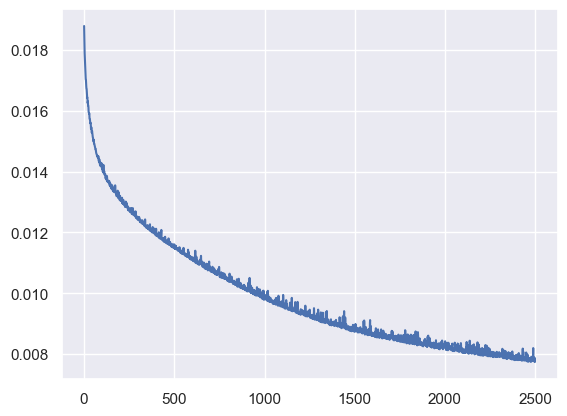

In [45]:
# plota as loss para ver se está treinando
plt.plot(historyteff.history['loss'][:])

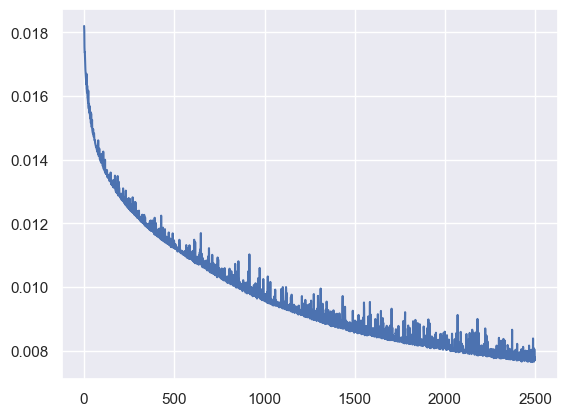

In [44]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyteff.history['val_loss'][:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando LOGG

In [145]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000) &
                 (csv['logg_training']>3.5),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [146]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000) &
                 (csv['logg_training']>3.5),
                 ['logg_training']]

In [147]:
ytrain.max()

logg_training    4.84
dtype: float64

In [148]:
ytrain.min()

logg_training    3.51
dtype: float64

In [149]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [150]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'logg_training')
#train_y= ytrain

In [151]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [152]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [153]:
bs = 3000

In [154]:
modellogg = baseline_model_logg()

In [155]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modellogg.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
12/12 - 1s - loss: 0.1870 - val_loss: 0.1806 - 1s/epoch - 104ms/step
Epoch 2/30
12/12 - 0s - loss: 0.1758 - val_loss: 0.1713 - 151ms/epoch - 13ms/step
Epoch 3/30
12/12 - 0s - loss: 0.1660 - val_loss: 0.1603 - 153ms/epoch - 13ms/step
Epoch 4/30
12/12 - 0s - loss: 0.1535 - val_loss: 0.1451 - 131ms/epoch - 11ms/step
Epoch 5/30
12/12 - 0s - loss: 0.1377 - val_loss: 0.1293 - 134ms/epoch - 11ms/step
Epoch 6/30
12/12 - 0s - loss: 0.1257 - val_loss: 0.1236 - 124ms/epoch - 10ms/step
Epoch 7/30
12/12 - 0s - loss: 0.1221 - val_loss: 0.1211 - 112ms/epoch - 9ms/step
Epoch 8/30
12/12 - 0s - loss: 0.1202 - val_loss: 0.1197 - 117ms/epoch - 10ms/step
Epoch 9/30
12/12 - 0s - loss: 0.1189 - val_loss: 0.1187 - 117ms/epoch - 10ms/step
Epoch 10/30
12/12 - 0s - loss: 0.1178 - val_loss: 0.1180 - 122ms/epoch - 10ms/step
Epoch 11/30
12/12 - 0s - loss: 0.1169 - val_loss: 0.1171 - 125ms/epoch - 10ms/step
Epoch 12/30
12/12 - 0s - loss: 0.1160 - val_loss: 0.1165 - 117ms/epoch - 10ms/step
Epoch 13/30
12/1

In [156]:
# Treinando e guardando o modelo                                                                                          (sample_weight=sample_weights, )
historylogg = modellogg.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modellogg.save('model/model_lamost_logg_V.h5') 

Epoch 1/3000
12/12 - 0s - loss: 0.1043 - val_loss: 0.1049 - 170ms/epoch - 14ms/step
Epoch 2/3000
12/12 - 0s - loss: 0.1037 - val_loss: 0.1042 - 139ms/epoch - 12ms/step
Epoch 3/3000
12/12 - 0s - loss: 0.1033 - val_loss: 0.1041 - 121ms/epoch - 10ms/step
Epoch 4/3000
12/12 - 0s - loss: 0.1029 - val_loss: 0.1032 - 115ms/epoch - 10ms/step
Epoch 5/3000
12/12 - 0s - loss: 0.1023 - val_loss: 0.1028 - 118ms/epoch - 10ms/step
Epoch 6/3000
12/12 - 0s - loss: 0.1018 - val_loss: 0.1030 - 115ms/epoch - 10ms/step
Epoch 7/3000
12/12 - 0s - loss: 0.1016 - val_loss: 0.1019 - 113ms/epoch - 9ms/step
Epoch 8/3000
12/12 - 0s - loss: 0.1009 - val_loss: 0.1015 - 112ms/epoch - 9ms/step
Epoch 9/3000
12/12 - 0s - loss: 0.1004 - val_loss: 0.1013 - 110ms/epoch - 9ms/step
Epoch 10/3000
12/12 - 0s - loss: 0.1001 - val_loss: 0.1006 - 106ms/epoch - 9ms/step
Epoch 11/3000
12/12 - 0s - loss: 0.0997 - val_loss: 0.1013 - 114ms/epoch - 10ms/step
Epoch 12/3000
12/12 - 0s - loss: 0.0995 - val_loss: 0.0996 - 106ms/epoch - 9ms

Epoch 99/3000
12/12 - 0s - loss: 0.0825 - val_loss: 0.0817 - 105ms/epoch - 9ms/step
Epoch 100/3000
12/12 - 0s - loss: 0.0803 - val_loss: 0.0785 - 104ms/epoch - 9ms/step
Epoch 101/3000
12/12 - 0s - loss: 0.0789 - val_loss: 0.0785 - 103ms/epoch - 9ms/step
Epoch 102/3000
12/12 - 0s - loss: 0.0788 - val_loss: 0.0780 - 120ms/epoch - 10ms/step
Epoch 103/3000
12/12 - 0s - loss: 0.0786 - val_loss: 0.0789 - 113ms/epoch - 9ms/step
Epoch 104/3000
12/12 - 0s - loss: 0.0789 - val_loss: 0.0781 - 117ms/epoch - 10ms/step
Epoch 105/3000
12/12 - 0s - loss: 0.0784 - val_loss: 0.0777 - 109ms/epoch - 9ms/step
Epoch 106/3000
12/12 - 0s - loss: 0.0783 - val_loss: 0.0784 - 109ms/epoch - 9ms/step
Epoch 107/3000
12/12 - 0s - loss: 0.0784 - val_loss: 0.0779 - 113ms/epoch - 9ms/step
Epoch 108/3000
12/12 - 0s - loss: 0.0786 - val_loss: 0.0773 - 112ms/epoch - 9ms/step
Epoch 109/3000
12/12 - 0s - loss: 0.0783 - val_loss: 0.0791 - 111ms/epoch - 9ms/step
Epoch 110/3000
12/12 - 0s - loss: 0.0785 - val_loss: 0.0774 - 11

Epoch 196/3000
12/12 - 0s - loss: 0.0730 - val_loss: 0.0714 - 97ms/epoch - 8ms/step
Epoch 197/3000
12/12 - 0s - loss: 0.0733 - val_loss: 0.0718 - 102ms/epoch - 9ms/step
Epoch 198/3000
12/12 - 0s - loss: 0.0722 - val_loss: 0.0713 - 103ms/epoch - 9ms/step
Epoch 199/3000
12/12 - 0s - loss: 0.0722 - val_loss: 0.0718 - 101ms/epoch - 8ms/step
Epoch 200/3000
12/12 - 0s - loss: 0.0721 - val_loss: 0.0711 - 103ms/epoch - 9ms/step
Epoch 201/3000
12/12 - 0s - loss: 0.0720 - val_loss: 0.0710 - 99ms/epoch - 8ms/step
Epoch 202/3000
12/12 - 0s - loss: 0.0721 - val_loss: 0.0710 - 103ms/epoch - 9ms/step
Epoch 203/3000
12/12 - 0s - loss: 0.0721 - val_loss: 0.0711 - 110ms/epoch - 9ms/step
Epoch 204/3000
12/12 - 0s - loss: 0.0719 - val_loss: 0.0710 - 98ms/epoch - 8ms/step
Epoch 205/3000
12/12 - 0s - loss: 0.0720 - val_loss: 0.0709 - 99ms/epoch - 8ms/step
Epoch 206/3000
12/12 - 0s - loss: 0.0720 - val_loss: 0.0712 - 102ms/epoch - 9ms/step
Epoch 207/3000
12/12 - 0s - loss: 0.0719 - val_loss: 0.0708 - 100ms/e

Epoch 293/3000
12/12 - 0s - loss: 0.0692 - val_loss: 0.0693 - 98ms/epoch - 8ms/step
Epoch 294/3000
12/12 - 0s - loss: 0.0692 - val_loss: 0.0689 - 101ms/epoch - 8ms/step
Epoch 295/3000
12/12 - 0s - loss: 0.0701 - val_loss: 0.0692 - 102ms/epoch - 9ms/step
Epoch 296/3000
12/12 - 0s - loss: 0.0699 - val_loss: 0.0680 - 101ms/epoch - 8ms/step
Epoch 297/3000
12/12 - 0s - loss: 0.0695 - val_loss: 0.0682 - 102ms/epoch - 9ms/step
Epoch 298/3000
12/12 - 0s - loss: 0.0698 - val_loss: 0.0686 - 105ms/epoch - 9ms/step
Epoch 299/3000
12/12 - 0s - loss: 0.0695 - val_loss: 0.0683 - 100ms/epoch - 8ms/step
Epoch 300/3000
12/12 - 0s - loss: 0.0689 - val_loss: 0.0680 - 107ms/epoch - 9ms/step
Epoch 301/3000
12/12 - 0s - loss: 0.0691 - val_loss: 0.0718 - 108ms/epoch - 9ms/step
Epoch 302/3000
12/12 - 0s - loss: 0.0696 - val_loss: 0.0689 - 104ms/epoch - 9ms/step
Epoch 303/3000
12/12 - 0s - loss: 0.0695 - val_loss: 0.0689 - 101ms/epoch - 8ms/step
Epoch 304/3000
12/12 - 0s - loss: 0.0702 - val_loss: 0.0687 - 103m

Epoch 390/3000
12/12 - 0s - loss: 0.0673 - val_loss: 0.0665 - 102ms/epoch - 9ms/step
Epoch 391/3000
12/12 - 0s - loss: 0.0687 - val_loss: 0.0665 - 102ms/epoch - 9ms/step
Epoch 392/3000
12/12 - 0s - loss: 0.0675 - val_loss: 0.0662 - 104ms/epoch - 9ms/step
Epoch 393/3000
12/12 - 0s - loss: 0.0679 - val_loss: 0.0670 - 103ms/epoch - 9ms/step
Epoch 394/3000
12/12 - 0s - loss: 0.0681 - val_loss: 0.0678 - 101ms/epoch - 8ms/step
Epoch 395/3000
12/12 - 0s - loss: 0.0673 - val_loss: 0.0661 - 111ms/epoch - 9ms/step
Epoch 396/3000
12/12 - 0s - loss: 0.0669 - val_loss: 0.0663 - 105ms/epoch - 9ms/step
Epoch 397/3000
12/12 - 0s - loss: 0.0669 - val_loss: 0.0668 - 100ms/epoch - 8ms/step
Epoch 398/3000
12/12 - 0s - loss: 0.0676 - val_loss: 0.0664 - 104ms/epoch - 9ms/step
Epoch 399/3000
12/12 - 0s - loss: 0.0670 - val_loss: 0.0659 - 98ms/epoch - 8ms/step
Epoch 400/3000
12/12 - 0s - loss: 0.0668 - val_loss: 0.0662 - 102ms/epoch - 9ms/step
Epoch 401/3000
12/12 - 0s - loss: 0.0672 - val_loss: 0.0660 - 99ms

Epoch 487/3000
12/12 - 0s - loss: 0.0668 - val_loss: 0.0669 - 99ms/epoch - 8ms/step
Epoch 488/3000
12/12 - 0s - loss: 0.0663 - val_loss: 0.0656 - 98ms/epoch - 8ms/step
Epoch 489/3000
12/12 - 0s - loss: 0.0658 - val_loss: 0.0651 - 101ms/epoch - 8ms/step
Epoch 490/3000
12/12 - 0s - loss: 0.0655 - val_loss: 0.0649 - 100ms/epoch - 8ms/step
Epoch 491/3000
12/12 - 0s - loss: 0.0656 - val_loss: 0.0646 - 99ms/epoch - 8ms/step
Epoch 492/3000
12/12 - 0s - loss: 0.0653 - val_loss: 0.0660 - 103ms/epoch - 9ms/step
Epoch 493/3000
12/12 - 0s - loss: 0.0658 - val_loss: 0.0668 - 98ms/epoch - 8ms/step
Epoch 494/3000
12/12 - 0s - loss: 0.0664 - val_loss: 0.0698 - 98ms/epoch - 8ms/step
Epoch 495/3000
12/12 - 0s - loss: 0.0680 - val_loss: 0.0695 - 102ms/epoch - 9ms/step
Epoch 496/3000
12/12 - 0s - loss: 0.0667 - val_loss: 0.0655 - 102ms/epoch - 9ms/step
Epoch 497/3000
12/12 - 0s - loss: 0.0657 - val_loss: 0.0667 - 104ms/epoch - 9ms/step
Epoch 498/3000
12/12 - 0s - loss: 0.0657 - val_loss: 0.0651 - 100ms/ep

Epoch 584/3000
12/12 - 0s - loss: 0.0644 - val_loss: 0.0636 - 101ms/epoch - 8ms/step
Epoch 585/3000
12/12 - 0s - loss: 0.0649 - val_loss: 0.0639 - 105ms/epoch - 9ms/step
Epoch 586/3000
12/12 - 0s - loss: 0.0643 - val_loss: 0.0643 - 101ms/epoch - 8ms/step
Epoch 587/3000
12/12 - 0s - loss: 0.0650 - val_loss: 0.0661 - 101ms/epoch - 8ms/step
Epoch 588/3000
12/12 - 0s - loss: 0.0659 - val_loss: 0.0649 - 106ms/epoch - 9ms/step
Epoch 589/3000
12/12 - 0s - loss: 0.0663 - val_loss: 0.0637 - 106ms/epoch - 9ms/step
Epoch 590/3000
12/12 - 0s - loss: 0.0654 - val_loss: 0.0650 - 105ms/epoch - 9ms/step
Epoch 591/3000
12/12 - 0s - loss: 0.0647 - val_loss: 0.0636 - 106ms/epoch - 9ms/step
Epoch 592/3000
12/12 - 0s - loss: 0.0645 - val_loss: 0.0651 - 102ms/epoch - 9ms/step
Epoch 593/3000
12/12 - 0s - loss: 0.0650 - val_loss: 0.0634 - 99ms/epoch - 8ms/step
Epoch 594/3000
12/12 - 0s - loss: 0.0642 - val_loss: 0.0635 - 98ms/epoch - 8ms/step
Epoch 595/3000
12/12 - 0s - loss: 0.0643 - val_loss: 0.0635 - 100ms

Epoch 681/3000
12/12 - 0s - loss: 0.0639 - val_loss: 0.0629 - 99ms/epoch - 8ms/step
Epoch 682/3000
12/12 - 0s - loss: 0.0640 - val_loss: 0.0651 - 99ms/epoch - 8ms/step
Epoch 683/3000
12/12 - 0s - loss: 0.0650 - val_loss: 0.0626 - 98ms/epoch - 8ms/step
Epoch 684/3000
12/12 - 0s - loss: 0.0637 - val_loss: 0.0630 - 100ms/epoch - 8ms/step
Epoch 685/3000
12/12 - 0s - loss: 0.0638 - val_loss: 0.0628 - 100ms/epoch - 8ms/step
Epoch 686/3000
12/12 - 0s - loss: 0.0633 - val_loss: 0.0624 - 101ms/epoch - 8ms/step
Epoch 687/3000
12/12 - 0s - loss: 0.0634 - val_loss: 0.0638 - 117ms/epoch - 10ms/step
Epoch 688/3000
12/12 - 0s - loss: 0.0637 - val_loss: 0.0625 - 119ms/epoch - 10ms/step
Epoch 689/3000
12/12 - 0s - loss: 0.0637 - val_loss: 0.0626 - 105ms/epoch - 9ms/step
Epoch 690/3000
12/12 - 0s - loss: 0.0635 - val_loss: 0.0625 - 98ms/epoch - 8ms/step
Epoch 691/3000
12/12 - 0s - loss: 0.0636 - val_loss: 0.0637 - 100ms/epoch - 8ms/step
Epoch 692/3000
12/12 - 0s - loss: 0.0635 - val_loss: 0.0630 - 104ms

Epoch 778/3000
12/12 - 0s - loss: 0.0643 - val_loss: 0.0639 - 142ms/epoch - 12ms/step
Epoch 779/3000
12/12 - 0s - loss: 0.0630 - val_loss: 0.0620 - 100ms/epoch - 8ms/step
Epoch 780/3000
12/12 - 0s - loss: 0.0627 - val_loss: 0.0621 - 98ms/epoch - 8ms/step
Epoch 781/3000
12/12 - 0s - loss: 0.0626 - val_loss: 0.0619 - 99ms/epoch - 8ms/step
Epoch 782/3000
12/12 - 0s - loss: 0.0625 - val_loss: 0.0638 - 98ms/epoch - 8ms/step
Epoch 783/3000
12/12 - 0s - loss: 0.0635 - val_loss: 0.0632 - 98ms/epoch - 8ms/step
Epoch 784/3000
12/12 - 0s - loss: 0.0650 - val_loss: 0.0647 - 98ms/epoch - 8ms/step
Epoch 785/3000
12/12 - 0s - loss: 0.0645 - val_loss: 0.0633 - 112ms/epoch - 9ms/step
Epoch 786/3000
12/12 - 0s - loss: 0.0633 - val_loss: 0.0629 - 97ms/epoch - 8ms/step
Epoch 787/3000
12/12 - 0s - loss: 0.0626 - val_loss: 0.0620 - 98ms/epoch - 8ms/step
Epoch 788/3000
12/12 - 0s - loss: 0.0628 - val_loss: 0.0619 - 101ms/epoch - 8ms/step
Epoch 789/3000
12/12 - 0s - loss: 0.0627 - val_loss: 0.0616 - 98ms/epoc

Epoch 875/3000
12/12 - 0s - loss: 0.0627 - val_loss: 0.0623 - 107ms/epoch - 9ms/step
Epoch 876/3000
12/12 - 0s - loss: 0.0624 - val_loss: 0.0621 - 105ms/epoch - 9ms/step
Epoch 877/3000
12/12 - 0s - loss: 0.0636 - val_loss: 0.0641 - 107ms/epoch - 9ms/step
Epoch 878/3000
12/12 - 0s - loss: 0.0639 - val_loss: 0.0624 - 102ms/epoch - 9ms/step
Epoch 879/3000
12/12 - 0s - loss: 0.0624 - val_loss: 0.0618 - 98ms/epoch - 8ms/step
Epoch 880/3000
12/12 - 0s - loss: 0.0633 - val_loss: 0.0648 - 101ms/epoch - 8ms/step
Epoch 881/3000
12/12 - 0s - loss: 0.0634 - val_loss: 0.0614 - 97ms/epoch - 8ms/step
Epoch 882/3000
12/12 - 0s - loss: 0.0638 - val_loss: 0.0660 - 98ms/epoch - 8ms/step
Epoch 883/3000
12/12 - 0s - loss: 0.0627 - val_loss: 0.0638 - 99ms/epoch - 8ms/step
Epoch 884/3000
12/12 - 0s - loss: 0.0630 - val_loss: 0.0616 - 101ms/epoch - 8ms/step
Epoch 885/3000
12/12 - 0s - loss: 0.0622 - val_loss: 0.0611 - 97ms/epoch - 8ms/step
Epoch 886/3000
12/12 - 0s - loss: 0.0617 - val_loss: 0.0611 - 98ms/epo

12/12 - 0s - loss: 0.0620 - val_loss: 0.0609 - 99ms/epoch - 8ms/step
Epoch 973/3000
12/12 - 0s - loss: 0.0614 - val_loss: 0.0622 - 113ms/epoch - 9ms/step
Epoch 974/3000
12/12 - 0s - loss: 0.0612 - val_loss: 0.0613 - 100ms/epoch - 8ms/step
Epoch 975/3000
12/12 - 0s - loss: 0.0617 - val_loss: 0.0616 - 98ms/epoch - 8ms/step
Epoch 976/3000
12/12 - 0s - loss: 0.0623 - val_loss: 0.0606 - 97ms/epoch - 8ms/step
Epoch 977/3000
12/12 - 0s - loss: 0.0614 - val_loss: 0.0606 - 98ms/epoch - 8ms/step
Epoch 978/3000
12/12 - 0s - loss: 0.0616 - val_loss: 0.0618 - 147ms/epoch - 12ms/step
Epoch 979/3000
12/12 - 0s - loss: 0.0615 - val_loss: 0.0608 - 106ms/epoch - 9ms/step
Epoch 980/3000
12/12 - 0s - loss: 0.0616 - val_loss: 0.0626 - 103ms/epoch - 9ms/step
Epoch 981/3000
12/12 - 0s - loss: 0.0626 - val_loss: 0.0608 - 102ms/epoch - 9ms/step
Epoch 982/3000
12/12 - 0s - loss: 0.0624 - val_loss: 0.0618 - 105ms/epoch - 9ms/step
Epoch 983/3000
12/12 - 0s - loss: 0.0615 - val_loss: 0.0608 - 100ms/epoch - 8ms/ste

Epoch 1069/3000
12/12 - 0s - loss: 0.0618 - val_loss: 0.0631 - 100ms/epoch - 8ms/step
Epoch 1070/3000
12/12 - 0s - loss: 0.0623 - val_loss: 0.0604 - 98ms/epoch - 8ms/step
Epoch 1071/3000
12/12 - 0s - loss: 0.0607 - val_loss: 0.0605 - 103ms/epoch - 9ms/step
Epoch 1072/3000
12/12 - 0s - loss: 0.0607 - val_loss: 0.0603 - 99ms/epoch - 8ms/step
Epoch 1073/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0610 - 98ms/epoch - 8ms/step
Epoch 1074/3000
12/12 - 0s - loss: 0.0611 - val_loss: 0.0613 - 96ms/epoch - 8ms/step
Epoch 1075/3000
12/12 - 0s - loss: 0.0617 - val_loss: 0.0607 - 98ms/epoch - 8ms/step
Epoch 1076/3000
12/12 - 0s - loss: 0.0613 - val_loss: 0.0613 - 98ms/epoch - 8ms/step
Epoch 1077/3000
12/12 - 0s - loss: 0.0607 - val_loss: 0.0606 - 100ms/epoch - 8ms/step
Epoch 1078/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0602 - 100ms/epoch - 8ms/step
Epoch 1079/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0614 - 102ms/epoch - 9ms/step
Epoch 1080/3000
12/12 - 0s - loss: 0.0611 - val_loss: 0.0607

Epoch 1165/3000
12/12 - 0s - loss: 0.0605 - val_loss: 0.0607 - 101ms/epoch - 8ms/step
Epoch 1166/3000
12/12 - 0s - loss: 0.0606 - val_loss: 0.0603 - 100ms/epoch - 8ms/step
Epoch 1167/3000
12/12 - 0s - loss: 0.0606 - val_loss: 0.0598 - 98ms/epoch - 8ms/step
Epoch 1168/3000
12/12 - 0s - loss: 0.0603 - val_loss: 0.0621 - 112ms/epoch - 9ms/step
Epoch 1169/3000
12/12 - 0s - loss: 0.0614 - val_loss: 0.0598 - 115ms/epoch - 10ms/step
Epoch 1170/3000
12/12 - 0s - loss: 0.0618 - val_loss: 0.0611 - 105ms/epoch - 9ms/step
Epoch 1171/3000
12/12 - 0s - loss: 0.0609 - val_loss: 0.0594 - 106ms/epoch - 9ms/step
Epoch 1172/3000
12/12 - 0s - loss: 0.0604 - val_loss: 0.0600 - 104ms/epoch - 9ms/step
Epoch 1173/3000
12/12 - 0s - loss: 0.0604 - val_loss: 0.0599 - 101ms/epoch - 8ms/step
Epoch 1174/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0601 - 98ms/epoch - 8ms/step
Epoch 1175/3000
12/12 - 0s - loss: 0.0617 - val_loss: 0.0601 - 100ms/epoch - 8ms/step
Epoch 1176/3000
12/12 - 0s - loss: 0.0606 - val_loss: 0

Epoch 1261/3000
12/12 - 0s - loss: 0.0599 - val_loss: 0.0595 - 97ms/epoch - 8ms/step
Epoch 1262/3000
12/12 - 0s - loss: 0.0599 - val_loss: 0.0595 - 99ms/epoch - 8ms/step
Epoch 1263/3000
12/12 - 0s - loss: 0.0598 - val_loss: 0.0593 - 105ms/epoch - 9ms/step
Epoch 1264/3000
12/12 - 0s - loss: 0.0603 - val_loss: 0.0595 - 104ms/epoch - 9ms/step
Epoch 1265/3000
12/12 - 0s - loss: 0.0600 - val_loss: 0.0605 - 102ms/epoch - 9ms/step
Epoch 1266/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0603 - 100ms/epoch - 8ms/step
Epoch 1267/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.0593 - 102ms/epoch - 9ms/step
Epoch 1268/3000
12/12 - 0s - loss: 0.0599 - val_loss: 0.0616 - 106ms/epoch - 9ms/step
Epoch 1269/3000
12/12 - 0s - loss: 0.0600 - val_loss: 0.0592 - 106ms/epoch - 9ms/step
Epoch 1270/3000
12/12 - 0s - loss: 0.0602 - val_loss: 0.0600 - 103ms/epoch - 9ms/step
Epoch 1271/3000
12/12 - 0s - loss: 0.0613 - val_loss: 0.0597 - 101ms/epoch - 8ms/step
Epoch 1272/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.

12/12 - 0s - loss: 0.0595 - val_loss: 0.0600 - 118ms/epoch - 10ms/step
Epoch 1357/3000
12/12 - 0s - loss: 0.0603 - val_loss: 0.0590 - 113ms/epoch - 9ms/step
Epoch 1358/3000
12/12 - 0s - loss: 0.0594 - val_loss: 0.0594 - 107ms/epoch - 9ms/step
Epoch 1359/3000
12/12 - 0s - loss: 0.0600 - val_loss: 0.0605 - 116ms/epoch - 10ms/step
Epoch 1360/3000
12/12 - 0s - loss: 0.0600 - val_loss: 0.0590 - 115ms/epoch - 10ms/step
Epoch 1361/3000
12/12 - 0s - loss: 0.0595 - val_loss: 0.0590 - 117ms/epoch - 10ms/step
Epoch 1362/3000
12/12 - 0s - loss: 0.0594 - val_loss: 0.0596 - 115ms/epoch - 10ms/step
Epoch 1363/3000
12/12 - 0s - loss: 0.0592 - val_loss: 0.0598 - 111ms/epoch - 9ms/step
Epoch 1364/3000
12/12 - 0s - loss: 0.0599 - val_loss: 0.0603 - 108ms/epoch - 9ms/step
Epoch 1365/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.0590 - 109ms/epoch - 9ms/step
Epoch 1366/3000
12/12 - 0s - loss: 0.0594 - val_loss: 0.0624 - 104ms/epoch - 9ms/step
Epoch 1367/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0606 - 10

Epoch 1451/3000
12/12 - 0s - loss: 0.0598 - val_loss: 0.0585 - 129ms/epoch - 11ms/step
Epoch 1452/3000
12/12 - 0s - loss: 0.0595 - val_loss: 0.0593 - 131ms/epoch - 11ms/step
Epoch 1453/3000
12/12 - 0s - loss: 0.0602 - val_loss: 0.0624 - 130ms/epoch - 11ms/step
Epoch 1454/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.0602 - 130ms/epoch - 11ms/step
Epoch 1455/3000
12/12 - 0s - loss: 0.0596 - val_loss: 0.0591 - 125ms/epoch - 10ms/step
Epoch 1456/3000
12/12 - 0s - loss: 0.0599 - val_loss: 0.0594 - 121ms/epoch - 10ms/step
Epoch 1457/3000
12/12 - 0s - loss: 0.0590 - val_loss: 0.0585 - 132ms/epoch - 11ms/step
Epoch 1458/3000
12/12 - 0s - loss: 0.0592 - val_loss: 0.0606 - 128ms/epoch - 11ms/step
Epoch 1459/3000
12/12 - 0s - loss: 0.0608 - val_loss: 0.0588 - 130ms/epoch - 11ms/step
Epoch 1460/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.0588 - 119ms/epoch - 10ms/step
Epoch 1461/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0595 - 124ms/epoch - 10ms/step
Epoch 1462/3000
12/12 - 0s - loss: 0.0592 -

Epoch 1546/3000
12/12 - 0s - loss: 0.0586 - val_loss: 0.0588 - 164ms/epoch - 14ms/step
Epoch 1547/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0602 - 390ms/epoch - 32ms/step
Epoch 1548/3000
12/12 - 0s - loss: 0.0593 - val_loss: 0.0599 - 296ms/epoch - 25ms/step
Epoch 1549/3000
12/12 - 0s - loss: 0.0596 - val_loss: 0.0589 - 124ms/epoch - 10ms/step
Epoch 1550/3000
12/12 - 0s - loss: 0.0595 - val_loss: 0.0582 - 426ms/epoch - 36ms/step
Epoch 1551/3000
12/12 - 0s - loss: 0.0592 - val_loss: 0.0595 - 147ms/epoch - 12ms/step
Epoch 1552/3000
12/12 - 0s - loss: 0.0600 - val_loss: 0.0582 - 123ms/epoch - 10ms/step
Epoch 1553/3000
12/12 - 0s - loss: 0.0584 - val_loss: 0.0593 - 125ms/epoch - 10ms/step
Epoch 1554/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0598 - 133ms/epoch - 11ms/step
Epoch 1555/3000
12/12 - 0s - loss: 0.0586 - val_loss: 0.0583 - 122ms/epoch - 10ms/step
Epoch 1556/3000
12/12 - 0s - loss: 0.0584 - val_loss: 0.0593 - 128ms/epoch - 11ms/step
Epoch 1557/3000
12/12 - 0s - loss: 0.0592 -

Epoch 1641/3000
12/12 - 1s - loss: 0.0586 - val_loss: 0.0580 - 552ms/epoch - 46ms/step
Epoch 1642/3000
12/12 - 1s - loss: 0.0580 - val_loss: 0.0597 - 1s/epoch - 113ms/step
Epoch 1643/3000
12/12 - 2s - loss: 0.0585 - val_loss: 0.0621 - 2s/epoch - 133ms/step
Epoch 1644/3000
12/12 - 0s - loss: 0.0592 - val_loss: 0.0605 - 380ms/epoch - 32ms/step
Epoch 1645/3000
12/12 - 1s - loss: 0.0591 - val_loss: 0.0603 - 514ms/epoch - 43ms/step
Epoch 1646/3000
12/12 - 0s - loss: 0.0597 - val_loss: 0.0656 - 428ms/epoch - 36ms/step
Epoch 1647/3000
12/12 - 1s - loss: 0.0600 - val_loss: 0.0628 - 869ms/epoch - 72ms/step
Epoch 1648/3000
12/12 - 1s - loss: 0.0593 - val_loss: 0.0587 - 1s/epoch - 86ms/step
Epoch 1649/3000
12/12 - 2s - loss: 0.0592 - val_loss: 0.0580 - 2s/epoch - 131ms/step
Epoch 1650/3000
12/12 - 1s - loss: 0.0583 - val_loss: 0.0582 - 1s/epoch - 108ms/step
Epoch 1651/3000
12/12 - 0s - loss: 0.0583 - val_loss: 0.0598 - 325ms/epoch - 27ms/step
Epoch 1652/3000
12/12 - 2s - loss: 0.0584 - val_loss: 

Epoch 1737/3000
12/12 - 2s - loss: 0.0601 - val_loss: 0.0580 - 2s/epoch - 147ms/step
Epoch 1738/3000
12/12 - 0s - loss: 0.0587 - val_loss: 0.0599 - 493ms/epoch - 41ms/step
Epoch 1739/3000
12/12 - 1s - loss: 0.0587 - val_loss: 0.0579 - 1s/epoch - 92ms/step
Epoch 1740/3000
12/12 - 1s - loss: 0.0585 - val_loss: 0.0582 - 779ms/epoch - 65ms/step
Epoch 1741/3000
12/12 - 1s - loss: 0.0591 - val_loss: 0.0580 - 658ms/epoch - 55ms/step
Epoch 1742/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0591 - 451ms/epoch - 38ms/step
Epoch 1743/3000
12/12 - 2s - loss: 0.0582 - val_loss: 0.0580 - 2s/epoch - 176ms/step
Epoch 1744/3000
12/12 - 1s - loss: 0.0588 - val_loss: 0.0577 - 1s/epoch - 113ms/step
Epoch 1745/3000
12/12 - 1s - loss: 0.0580 - val_loss: 0.0600 - 997ms/epoch - 83ms/step
Epoch 1746/3000
12/12 - 1s - loss: 0.0588 - val_loss: 0.0578 - 811ms/epoch - 68ms/step
Epoch 1747/3000
12/12 - 1s - loss: 0.0580 - val_loss: 0.0585 - 1s/epoch - 91ms/step
Epoch 1748/3000
12/12 - 0s - loss: 0.0586 - val_loss: 0

Epoch 1832/3000
12/12 - 0s - loss: 0.0576 - val_loss: 0.0578 - 226ms/epoch - 19ms/step
Epoch 1833/3000
12/12 - 1s - loss: 0.0581 - val_loss: 0.0612 - 1s/epoch - 95ms/step
Epoch 1834/3000
12/12 - 0s - loss: 0.0583 - val_loss: 0.0583 - 272ms/epoch - 23ms/step
Epoch 1835/3000
12/12 - 0s - loss: 0.0579 - val_loss: 0.0577 - 467ms/epoch - 39ms/step
Epoch 1836/3000
12/12 - 1s - loss: 0.0578 - val_loss: 0.0574 - 681ms/epoch - 57ms/step
Epoch 1837/3000
12/12 - 1s - loss: 0.0577 - val_loss: 0.0579 - 605ms/epoch - 50ms/step
Epoch 1838/3000
12/12 - 0s - loss: 0.0578 - val_loss: 0.0577 - 302ms/epoch - 25ms/step
Epoch 1839/3000
12/12 - 0s - loss: 0.0584 - val_loss: 0.0584 - 172ms/epoch - 14ms/step
Epoch 1840/3000
12/12 - 1s - loss: 0.0584 - val_loss: 0.0577 - 674ms/epoch - 56ms/step
Epoch 1841/3000
12/12 - 0s - loss: 0.0584 - val_loss: 0.0608 - 154ms/epoch - 13ms/step
Epoch 1842/3000
12/12 - 0s - loss: 0.0593 - val_loss: 0.0594 - 182ms/epoch - 15ms/step
Epoch 1843/3000
12/12 - 0s - loss: 0.0584 - va

Epoch 1927/3000
12/12 - 0s - loss: 0.0580 - val_loss: 0.0592 - 159ms/epoch - 13ms/step
Epoch 1928/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0575 - 162ms/epoch - 14ms/step
Epoch 1929/3000
12/12 - 0s - loss: 0.0585 - val_loss: 0.0614 - 319ms/epoch - 27ms/step
Epoch 1930/3000
12/12 - 0s - loss: 0.0594 - val_loss: 0.0587 - 229ms/epoch - 19ms/step
Epoch 1931/3000
12/12 - 0s - loss: 0.0581 - val_loss: 0.0575 - 237ms/epoch - 20ms/step
Epoch 1932/3000
12/12 - 0s - loss: 0.0575 - val_loss: 0.0577 - 161ms/epoch - 13ms/step
Epoch 1933/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0578 - 142ms/epoch - 12ms/step
Epoch 1934/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0576 - 171ms/epoch - 14ms/step
Epoch 1935/3000
12/12 - 0s - loss: 0.0574 - val_loss: 0.0579 - 151ms/epoch - 13ms/step
Epoch 1936/3000
12/12 - 0s - loss: 0.0575 - val_loss: 0.0573 - 181ms/epoch - 15ms/step
Epoch 1937/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0573 - 226ms/epoch - 19ms/step
Epoch 1938/3000
12/12 - 0s - loss: 0.0577 -

Epoch 2022/3000
12/12 - 0s - loss: 0.0575 - val_loss: 0.0582 - 226ms/epoch - 19ms/step
Epoch 2023/3000
12/12 - 0s - loss: 0.0576 - val_loss: 0.0579 - 440ms/epoch - 37ms/step
Epoch 2024/3000
12/12 - 0s - loss: 0.0572 - val_loss: 0.0573 - 144ms/epoch - 12ms/step
Epoch 2025/3000
12/12 - 0s - loss: 0.0578 - val_loss: 0.0588 - 172ms/epoch - 14ms/step
Epoch 2026/3000
12/12 - 0s - loss: 0.0582 - val_loss: 0.0589 - 162ms/epoch - 14ms/step
Epoch 2027/3000
12/12 - 0s - loss: 0.0585 - val_loss: 0.0590 - 416ms/epoch - 35ms/step
Epoch 2028/3000
12/12 - 0s - loss: 0.0578 - val_loss: 0.0587 - 191ms/epoch - 16ms/step
Epoch 2029/3000
12/12 - 0s - loss: 0.0580 - val_loss: 0.0576 - 160ms/epoch - 13ms/step
Epoch 2030/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0583 - 162ms/epoch - 14ms/step
Epoch 2031/3000
12/12 - 0s - loss: 0.0571 - val_loss: 0.0579 - 372ms/epoch - 31ms/step
Epoch 2032/3000
12/12 - 0s - loss: 0.0577 - val_loss: 0.0582 - 177ms/epoch - 15ms/step
Epoch 2033/3000
12/12 - 0s - loss: 0.0573 -

Epoch 2117/3000
12/12 - 0s - loss: 0.0581 - val_loss: 0.0583 - 179ms/epoch - 15ms/step
Epoch 2118/3000
12/12 - 0s - loss: 0.0574 - val_loss: 0.0578 - 166ms/epoch - 14ms/step
Epoch 2119/3000
12/12 - 0s - loss: 0.0570 - val_loss: 0.0576 - 192ms/epoch - 16ms/step
Epoch 2120/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0633 - 144ms/epoch - 12ms/step
Epoch 2121/3000
12/12 - 0s - loss: 0.0583 - val_loss: 0.0596 - 149ms/epoch - 12ms/step
Epoch 2122/3000
12/12 - 0s - loss: 0.0572 - val_loss: 0.0577 - 378ms/epoch - 31ms/step
Epoch 2123/3000
12/12 - 0s - loss: 0.0577 - val_loss: 0.0595 - 177ms/epoch - 15ms/step
Epoch 2124/3000
12/12 - 0s - loss: 0.0576 - val_loss: 0.0576 - 159ms/epoch - 13ms/step
Epoch 2125/3000
12/12 - 0s - loss: 0.0570 - val_loss: 0.0570 - 163ms/epoch - 14ms/step
Epoch 2126/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0593 - 309ms/epoch - 26ms/step
Epoch 2127/3000
12/12 - 1s - loss: 0.0577 - val_loss: 0.0576 - 611ms/epoch - 51ms/step
Epoch 2128/3000
12/12 - 0s - loss: 0.0567 -

Epoch 2212/3000
12/12 - 0s - loss: 0.0591 - val_loss: 0.0575 - 170ms/epoch - 14ms/step
Epoch 2213/3000
12/12 - 0s - loss: 0.0581 - val_loss: 0.0578 - 143ms/epoch - 12ms/step
Epoch 2214/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0569 - 178ms/epoch - 15ms/step
Epoch 2215/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0573 - 160ms/epoch - 13ms/step
Epoch 2216/3000
12/12 - 0s - loss: 0.0567 - val_loss: 0.0573 - 151ms/epoch - 13ms/step
Epoch 2217/3000
12/12 - 0s - loss: 0.0576 - val_loss: 0.0580 - 255ms/epoch - 21ms/step
Epoch 2218/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0566 - 165ms/epoch - 14ms/step
Epoch 2219/3000
12/12 - 0s - loss: 0.0566 - val_loss: 0.0577 - 178ms/epoch - 15ms/step
Epoch 2220/3000
12/12 - 0s - loss: 0.0565 - val_loss: 0.0578 - 200ms/epoch - 17ms/step
Epoch 2221/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0573 - 141ms/epoch - 12ms/step
Epoch 2222/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0565 - 145ms/epoch - 12ms/step
Epoch 2223/3000
12/12 - 0s - loss: 0.0566 -

Epoch 2307/3000
12/12 - 0s - loss: 0.0565 - val_loss: 0.0566 - 185ms/epoch - 15ms/step
Epoch 2308/3000
12/12 - 0s - loss: 0.0561 - val_loss: 0.0572 - 150ms/epoch - 13ms/step
Epoch 2309/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0564 - 155ms/epoch - 13ms/step
Epoch 2310/3000
12/12 - 0s - loss: 0.0567 - val_loss: 0.0563 - 160ms/epoch - 13ms/step
Epoch 2311/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0564 - 150ms/epoch - 13ms/step
Epoch 2312/3000
12/12 - 0s - loss: 0.0565 - val_loss: 0.0569 - 152ms/epoch - 13ms/step
Epoch 2313/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0567 - 165ms/epoch - 14ms/step
Epoch 2314/3000
12/12 - 1s - loss: 0.0565 - val_loss: 0.0564 - 850ms/epoch - 71ms/step
Epoch 2315/3000
12/12 - 2s - loss: 0.0568 - val_loss: 0.0574 - 2s/epoch - 133ms/step
Epoch 2316/3000
12/12 - 1s - loss: 0.0578 - val_loss: 0.0581 - 834ms/epoch - 69ms/step
Epoch 2317/3000
12/12 - 0s - loss: 0.0579 - val_loss: 0.0565 - 151ms/epoch - 13ms/step
Epoch 2318/3000
12/12 - 0s - loss: 0.0570 - v

Epoch 2402/3000
12/12 - 2s - loss: 0.0560 - val_loss: 0.0597 - 2s/epoch - 129ms/step
Epoch 2403/3000
12/12 - 1s - loss: 0.0566 - val_loss: 0.0565 - 830ms/epoch - 69ms/step
Epoch 2404/3000
12/12 - 1s - loss: 0.0566 - val_loss: 0.0571 - 1s/epoch - 94ms/step
Epoch 2405/3000
12/12 - 2s - loss: 0.0568 - val_loss: 0.0576 - 2s/epoch - 206ms/step
Epoch 2406/3000
12/12 - 0s - loss: 0.0564 - val_loss: 0.0592 - 279ms/epoch - 23ms/step
Epoch 2407/3000
12/12 - 0s - loss: 0.0576 - val_loss: 0.0580 - 145ms/epoch - 12ms/step
Epoch 2408/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0583 - 158ms/epoch - 13ms/step
Epoch 2409/3000
12/12 - 1s - loss: 0.0564 - val_loss: 0.0579 - 557ms/epoch - 46ms/step
Epoch 2410/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0587 - 204ms/epoch - 17ms/step
Epoch 2411/3000
12/12 - 0s - loss: 0.0564 - val_loss: 0.0570 - 140ms/epoch - 12ms/step
Epoch 2412/3000
12/12 - 0s - loss: 0.0564 - val_loss: 0.0573 - 187ms/epoch - 16ms/step
Epoch 2413/3000
12/12 - 0s - loss: 0.0564 - val_lo

Epoch 2497/3000
12/12 - 1s - loss: 0.0565 - val_loss: 0.0578 - 1s/epoch - 116ms/step
Epoch 2498/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0580 - 434ms/epoch - 36ms/step
Epoch 2499/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0657 - 192ms/epoch - 16ms/step
Epoch 2500/3000
12/12 - 0s - loss: 0.0586 - val_loss: 0.0574 - 288ms/epoch - 24ms/step
Epoch 2501/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0568 - 430ms/epoch - 36ms/step
Epoch 2502/3000
12/12 - 0s - loss: 0.0579 - val_loss: 0.0567 - 486ms/epoch - 41ms/step
Epoch 2503/3000
12/12 - 1s - loss: 0.0562 - val_loss: 0.0565 - 1s/epoch - 94ms/step
Epoch 2504/3000
12/12 - 1s - loss: 0.0559 - val_loss: 0.0576 - 871ms/epoch - 73ms/step
Epoch 2505/3000
12/12 - 0s - loss: 0.0561 - val_loss: 0.0566 - 359ms/epoch - 30ms/step
Epoch 2506/3000
12/12 - 0s - loss: 0.0569 - val_loss: 0.0575 - 126ms/epoch - 11ms/step
Epoch 2507/3000
12/12 - 0s - loss: 0.0563 - val_loss: 0.0567 - 245ms/epoch - 20ms/step
Epoch 2508/3000
12/12 - 0s - loss: 0.0561 - val_

Epoch 2592/3000
12/12 - 0s - loss: 0.0563 - val_loss: 0.0572 - 129ms/epoch - 11ms/step
Epoch 2593/3000
12/12 - 0s - loss: 0.0559 - val_loss: 0.0562 - 149ms/epoch - 12ms/step
Epoch 2594/3000
12/12 - 0s - loss: 0.0560 - val_loss: 0.0569 - 141ms/epoch - 12ms/step
Epoch 2595/3000
12/12 - 0s - loss: 0.0559 - val_loss: 0.0565 - 141ms/epoch - 12ms/step
Epoch 2596/3000
12/12 - 0s - loss: 0.0558 - val_loss: 0.0561 - 157ms/epoch - 13ms/step
Epoch 2597/3000
12/12 - 0s - loss: 0.0561 - val_loss: 0.0562 - 129ms/epoch - 11ms/step
Epoch 2598/3000
12/12 - 0s - loss: 0.0566 - val_loss: 0.0565 - 166ms/epoch - 14ms/step
Epoch 2599/3000
12/12 - 5s - loss: 0.0568 - val_loss: 0.0563 - 5s/epoch - 445ms/step
Epoch 2600/3000
12/12 - 0s - loss: 0.0566 - val_loss: 0.0567 - 140ms/epoch - 12ms/step
Epoch 2601/3000
12/12 - 0s - loss: 0.0565 - val_loss: 0.0564 - 120ms/epoch - 10ms/step
Epoch 2602/3000
12/12 - 0s - loss: 0.0559 - val_loss: 0.0601 - 126ms/epoch - 11ms/step
Epoch 2603/3000
12/12 - 0s - loss: 0.0573 - v

Epoch 2687/3000
12/12 - 0s - loss: 0.0586 - val_loss: 0.0593 - 178ms/epoch - 15ms/step
Epoch 2688/3000
12/12 - 0s - loss: 0.0573 - val_loss: 0.0576 - 228ms/epoch - 19ms/step
Epoch 2689/3000
12/12 - 0s - loss: 0.0571 - val_loss: 0.0564 - 192ms/epoch - 16ms/step
Epoch 2690/3000
12/12 - 0s - loss: 0.0581 - val_loss: 0.0577 - 178ms/epoch - 15ms/step
Epoch 2691/3000
12/12 - 0s - loss: 0.0588 - val_loss: 0.0614 - 168ms/epoch - 14ms/step
Epoch 2692/3000
12/12 - 0s - loss: 0.0578 - val_loss: 0.0572 - 312ms/epoch - 26ms/step
Epoch 2693/3000
12/12 - 0s - loss: 0.0560 - val_loss: 0.0559 - 179ms/epoch - 15ms/step
Epoch 2694/3000
12/12 - 0s - loss: 0.0555 - val_loss: 0.0560 - 172ms/epoch - 14ms/step
Epoch 2695/3000
12/12 - 0s - loss: 0.0559 - val_loss: 0.0562 - 144ms/epoch - 12ms/step
Epoch 2696/3000
12/12 - 0s - loss: 0.0554 - val_loss: 0.0570 - 144ms/epoch - 12ms/step
Epoch 2697/3000
12/12 - 0s - loss: 0.0570 - val_loss: 0.0581 - 191ms/epoch - 16ms/step
Epoch 2698/3000
12/12 - 0s - loss: 0.0567 -

Epoch 2782/3000
12/12 - 0s - loss: 0.0554 - val_loss: 0.0557 - 149ms/epoch - 12ms/step
Epoch 2783/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0562 - 132ms/epoch - 11ms/step
Epoch 2784/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0560 - 133ms/epoch - 11ms/step
Epoch 2785/3000
12/12 - 0s - loss: 0.0557 - val_loss: 0.0560 - 139ms/epoch - 12ms/step
Epoch 2786/3000
12/12 - 0s - loss: 0.0556 - val_loss: 0.0559 - 140ms/epoch - 12ms/step
Epoch 2787/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0558 - 158ms/epoch - 13ms/step
Epoch 2788/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0558 - 145ms/epoch - 12ms/step
Epoch 2789/3000
12/12 - 0s - loss: 0.0567 - val_loss: 0.0577 - 374ms/epoch - 31ms/step
Epoch 2790/3000
12/12 - 0s - loss: 0.0567 - val_loss: 0.0578 - 153ms/epoch - 13ms/step
Epoch 2791/3000
12/12 - 0s - loss: 0.0565 - val_loss: 0.0576 - 139ms/epoch - 12ms/step
Epoch 2792/3000
12/12 - 0s - loss: 0.0563 - val_loss: 0.0570 - 151ms/epoch - 13ms/step
Epoch 2793/3000
12/12 - 0s - loss: 0.0566 -

12/12 - 0s - loss: 0.0556 - val_loss: 0.0561 - 352ms/epoch - 29ms/step
Epoch 2877/3000
12/12 - 0s - loss: 0.0554 - val_loss: 0.0606 - 347ms/epoch - 29ms/step
Epoch 2878/3000
12/12 - 1s - loss: 0.0566 - val_loss: 0.0567 - 525ms/epoch - 44ms/step
Epoch 2879/3000
12/12 - 1s - loss: 0.0554 - val_loss: 0.0575 - 874ms/epoch - 73ms/step
Epoch 2880/3000
12/12 - 1s - loss: 0.0562 - val_loss: 0.0640 - 838ms/epoch - 70ms/step
Epoch 2881/3000
12/12 - 0s - loss: 0.0579 - val_loss: 0.0559 - 472ms/epoch - 39ms/step
Epoch 2882/3000
12/12 - 2s - loss: 0.0559 - val_loss: 0.0567 - 2s/epoch - 199ms/step
Epoch 2883/3000
12/12 - 1s - loss: 0.0560 - val_loss: 0.0585 - 999ms/epoch - 83ms/step
Epoch 2884/3000
12/12 - 0s - loss: 0.0568 - val_loss: 0.0559 - 348ms/epoch - 29ms/step
Epoch 2885/3000
12/12 - 0s - loss: 0.0559 - val_loss: 0.0568 - 487ms/epoch - 41ms/step
Epoch 2886/3000
12/12 - 1s - loss: 0.0555 - val_loss: 0.0564 - 540ms/epoch - 45ms/step
Epoch 2887/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0557 

Epoch 2971/3000
12/12 - 0s - loss: 0.0556 - val_loss: 0.0576 - 443ms/epoch - 37ms/step
Epoch 2972/3000
12/12 - 0s - loss: 0.0558 - val_loss: 0.0568 - 199ms/epoch - 17ms/step
Epoch 2973/3000
12/12 - 0s - loss: 0.0554 - val_loss: 0.0560 - 280ms/epoch - 23ms/step
Epoch 2974/3000
12/12 - 0s - loss: 0.0556 - val_loss: 0.0557 - 248ms/epoch - 21ms/step
Epoch 2975/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0562 - 248ms/epoch - 21ms/step
Epoch 2976/3000
12/12 - 0s - loss: 0.0550 - val_loss: 0.0556 - 365ms/epoch - 30ms/step
Epoch 2977/3000
12/12 - 0s - loss: 0.0557 - val_loss: 0.0557 - 253ms/epoch - 21ms/step
Epoch 2978/3000
12/12 - 0s - loss: 0.0551 - val_loss: 0.0557 - 263ms/epoch - 22ms/step
Epoch 2979/3000
12/12 - 0s - loss: 0.0562 - val_loss: 0.0593 - 262ms/epoch - 22ms/step
Epoch 2980/3000
12/12 - 1s - loss: 0.0567 - val_loss: 0.0562 - 729ms/epoch - 61ms/step
Epoch 2981/3000
12/12 - 0s - loss: 0.0553 - val_loss: 0.0573 - 240ms/epoch - 20ms/step
Epoch 2982/3000
12/12 - 0s - loss: 0.0557 -

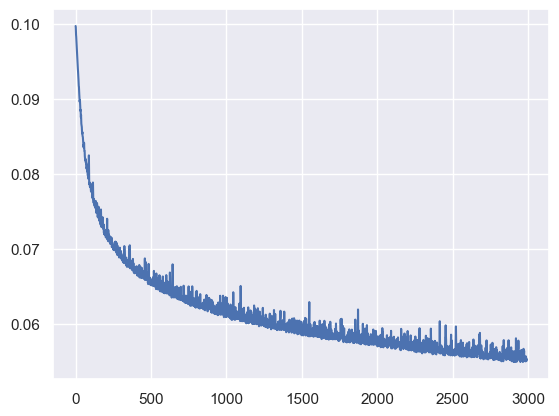

In [157]:
# plota as loss para ver se está treinando
plt.plot(historylogg.history['loss'][10:])

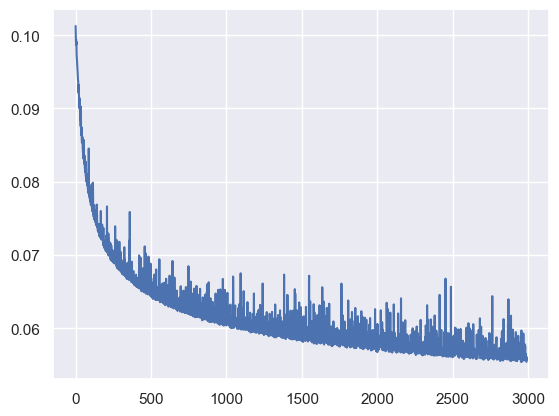

In [158]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historylogg.history['val_loss'][10:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando FEH

In [105]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000) &
                 (csv['logg_training']>3.5),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [106]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000) &
                 (csv['logg_training']>3.5),
                 ['feh_training']]

In [121]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [107]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'feh_training')
#train_y= ytrain

In [108]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [109]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [110]:
bs = 3000

In [113]:
modelfeh = baseline_model_feh()

In [114]:
# Rodar os primeiros testes para ignorar os maiores loss                                              (sample_weight=sample_weights, )
modelfeh.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
12/12 - 6s - loss: 0.2447 - val_loss: 0.1613 - 6s/epoch - 471ms/step
Epoch 2/30
12/12 - 0s - loss: 0.1201 - val_loss: 0.0862 - 264ms/epoch - 22ms/step
Epoch 3/30
12/12 - 0s - loss: 0.0886 - val_loss: 0.0890 - 303ms/epoch - 25ms/step
Epoch 4/30
12/12 - 0s - loss: 0.0846 - val_loss: 0.0830 - 425ms/epoch - 35ms/step
Epoch 5/30
12/12 - 8s - loss: 0.0823 - val_loss: 0.0809 - 8s/epoch - 631ms/step
Epoch 6/30
12/12 - 0s - loss: 0.0799 - val_loss: 0.0794 - 298ms/epoch - 25ms/step
Epoch 7/30
12/12 - 1s - loss: 0.0784 - val_loss: 0.0779 - 589ms/epoch - 49ms/step
Epoch 8/30
12/12 - 0s - loss: 0.0772 - val_loss: 0.0769 - 371ms/epoch - 31ms/step
Epoch 9/30
12/12 - 0s - loss: 0.0763 - val_loss: 0.0760 - 381ms/epoch - 32ms/step
Epoch 10/30
12/12 - 0s - loss: 0.0755 - val_loss: 0.0752 - 324ms/epoch - 27ms/step
Epoch 11/30
12/12 - 1s - loss: 0.0747 - val_loss: 0.0744 - 650ms/epoch - 54ms/step
Epoch 12/30
12/12 - 1s - loss: 0.0739 - val_loss: 0.0736 - 524ms/epoch - 44ms/step
Epoch 13/30
12/12

In [115]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyfeh = modelfeh.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modelfeh.save('model/model_lamost_feh_V.h5')

Epoch 1/3000
12/12 - 2s - loss: 0.0610 - val_loss: 0.0606 - 2s/epoch - 178ms/step
Epoch 2/3000
12/12 - 8s - loss: 0.0603 - val_loss: 0.0599 - 8s/epoch - 642ms/step
Epoch 3/3000
12/12 - 4s - loss: 0.0597 - val_loss: 0.0594 - 4s/epoch - 317ms/step
Epoch 4/3000
12/12 - 4s - loss: 0.0590 - val_loss: 0.0586 - 4s/epoch - 329ms/step
Epoch 5/3000
12/12 - 3s - loss: 0.0584 - val_loss: 0.0579 - 3s/epoch - 224ms/step
Epoch 6/3000
12/12 - 1s - loss: 0.0578 - val_loss: 0.0576 - 1s/epoch - 95ms/step
Epoch 7/3000
12/12 - 5s - loss: 0.0573 - val_loss: 0.0569 - 5s/epoch - 427ms/step
Epoch 8/3000
12/12 - 3s - loss: 0.0567 - val_loss: 0.0562 - 3s/epoch - 255ms/step
Epoch 9/3000
12/12 - 1s - loss: 0.0562 - val_loss: 0.0557 - 703ms/epoch - 59ms/step
Epoch 10/3000
12/12 - 0s - loss: 0.0557 - val_loss: 0.0553 - 311ms/epoch - 26ms/step
Epoch 11/3000
12/12 - 0s - loss: 0.0554 - val_loss: 0.0548 - 276ms/epoch - 23ms/step
Epoch 12/3000
12/12 - 0s - loss: 0.0548 - val_loss: 0.0544 - 261ms/epoch - 22ms/step
Epoch 

12/12 - 0s - loss: 0.0383 - val_loss: 0.0385 - 102ms/epoch - 9ms/step
Epoch 99/3000
12/12 - 0s - loss: 0.0383 - val_loss: 0.0383 - 93ms/epoch - 8ms/step
Epoch 100/3000
12/12 - 0s - loss: 0.0382 - val_loss: 0.0383 - 93ms/epoch - 8ms/step
Epoch 101/3000
12/12 - 0s - loss: 0.0382 - val_loss: 0.0381 - 102ms/epoch - 9ms/step
Epoch 102/3000
12/12 - 0s - loss: 0.0383 - val_loss: 0.0396 - 99ms/epoch - 8ms/step
Epoch 103/3000
12/12 - 0s - loss: 0.0383 - val_loss: 0.0384 - 104ms/epoch - 9ms/step
Epoch 104/3000
12/12 - 0s - loss: 0.0379 - val_loss: 0.0379 - 99ms/epoch - 8ms/step
Epoch 105/3000
12/12 - 0s - loss: 0.0378 - val_loss: 0.0390 - 95ms/epoch - 8ms/step
Epoch 106/3000
12/12 - 0s - loss: 0.0380 - val_loss: 0.0377 - 95ms/epoch - 8ms/step
Epoch 107/3000
12/12 - 0s - loss: 0.0377 - val_loss: 0.0377 - 94ms/epoch - 8ms/step
Epoch 108/3000
12/12 - 0s - loss: 0.0376 - val_loss: 0.0377 - 95ms/epoch - 8ms/step
Epoch 109/3000
12/12 - 0s - loss: 0.0375 - val_loss: 0.0375 - 99ms/epoch - 8ms/step
Epoch

Epoch 196/3000
12/12 - 0s - loss: 0.0320 - val_loss: 0.0320 - 95ms/epoch - 8ms/step
Epoch 197/3000
12/12 - 0s - loss: 0.0321 - val_loss: 0.0325 - 95ms/epoch - 8ms/step
Epoch 198/3000
12/12 - 0s - loss: 0.0330 - val_loss: 0.0334 - 93ms/epoch - 8ms/step
Epoch 199/3000
12/12 - 0s - loss: 0.0326 - val_loss: 0.0327 - 96ms/epoch - 8ms/step
Epoch 200/3000
12/12 - 0s - loss: 0.0324 - val_loss: 0.0321 - 102ms/epoch - 9ms/step
Epoch 201/3000
12/12 - 0s - loss: 0.0321 - val_loss: 0.0332 - 102ms/epoch - 9ms/step
Epoch 202/3000
12/12 - 0s - loss: 0.0322 - val_loss: 0.0318 - 99ms/epoch - 8ms/step
Epoch 203/3000
12/12 - 0s - loss: 0.0320 - val_loss: 0.0323 - 94ms/epoch - 8ms/step
Epoch 204/3000
12/12 - 0s - loss: 0.0317 - val_loss: 0.0322 - 97ms/epoch - 8ms/step
Epoch 205/3000
12/12 - 0s - loss: 0.0317 - val_loss: 0.0317 - 105ms/epoch - 9ms/step
Epoch 206/3000
12/12 - 0s - loss: 0.0316 - val_loss: 0.0315 - 106ms/epoch - 9ms/step
Epoch 207/3000
12/12 - 0s - loss: 0.0317 - val_loss: 0.0313 - 109ms/epoc

Epoch 293/3000
12/12 - 0s - loss: 0.0281 - val_loss: 0.0276 - 93ms/epoch - 8ms/step
Epoch 294/3000
12/12 - 0s - loss: 0.0277 - val_loss: 0.0276 - 94ms/epoch - 8ms/step
Epoch 295/3000
12/12 - 0s - loss: 0.0278 - val_loss: 0.0275 - 114ms/epoch - 10ms/step
Epoch 296/3000
12/12 - 0s - loss: 0.0277 - val_loss: 0.0275 - 139ms/epoch - 12ms/step
Epoch 297/3000
12/12 - 0s - loss: 0.0281 - val_loss: 0.0289 - 118ms/epoch - 10ms/step
Epoch 298/3000
12/12 - 0s - loss: 0.0286 - val_loss: 0.0274 - 96ms/epoch - 8ms/step
Epoch 299/3000
12/12 - 0s - loss: 0.0280 - val_loss: 0.0280 - 98ms/epoch - 8ms/step
Epoch 300/3000
12/12 - 0s - loss: 0.0275 - val_loss: 0.0272 - 101ms/epoch - 8ms/step
Epoch 301/3000
12/12 - 0s - loss: 0.0273 - val_loss: 0.0273 - 93ms/epoch - 8ms/step
Epoch 302/3000
12/12 - 0s - loss: 0.0272 - val_loss: 0.0274 - 94ms/epoch - 8ms/step
Epoch 303/3000
12/12 - 0s - loss: 0.0274 - val_loss: 0.0273 - 93ms/epoch - 8ms/step
Epoch 304/3000
12/12 - 0s - loss: 0.0275 - val_loss: 0.0280 - 95ms/ep

Epoch 391/3000
12/12 - 0s - loss: 0.0253 - val_loss: 0.0258 - 98ms/epoch - 8ms/step
Epoch 392/3000
12/12 - 0s - loss: 0.0261 - val_loss: 0.0254 - 95ms/epoch - 8ms/step
Epoch 393/3000
12/12 - 0s - loss: 0.0261 - val_loss: 0.0257 - 94ms/epoch - 8ms/step
Epoch 394/3000
12/12 - 0s - loss: 0.0257 - val_loss: 0.0258 - 94ms/epoch - 8ms/step
Epoch 395/3000
12/12 - 0s - loss: 0.0263 - val_loss: 0.0259 - 98ms/epoch - 8ms/step
Epoch 396/3000
12/12 - 0s - loss: 0.0265 - val_loss: 0.0251 - 95ms/epoch - 8ms/step
Epoch 397/3000
12/12 - 0s - loss: 0.0256 - val_loss: 0.0254 - 99ms/epoch - 8ms/step
Epoch 398/3000
12/12 - 0s - loss: 0.0257 - val_loss: 0.0251 - 98ms/epoch - 8ms/step
Epoch 399/3000
12/12 - 0s - loss: 0.0274 - val_loss: 0.0276 - 95ms/epoch - 8ms/step
Epoch 400/3000
12/12 - 0s - loss: 0.0294 - val_loss: 0.0307 - 94ms/epoch - 8ms/step
Epoch 401/3000
12/12 - 0s - loss: 0.0278 - val_loss: 0.0258 - 97ms/epoch - 8ms/step
Epoch 402/3000
12/12 - 0s - loss: 0.0262 - val_loss: 0.0252 - 97ms/epoch - 8

Epoch 489/3000
12/12 - 0s - loss: 0.0253 - val_loss: 0.0244 - 98ms/epoch - 8ms/step
Epoch 490/3000
12/12 - 0s - loss: 0.0244 - val_loss: 0.0241 - 94ms/epoch - 8ms/step
Epoch 491/3000
12/12 - 0s - loss: 0.0249 - val_loss: 0.0257 - 96ms/epoch - 8ms/step
Epoch 492/3000
12/12 - 0s - loss: 0.0246 - val_loss: 0.0240 - 100ms/epoch - 8ms/step
Epoch 493/3000
12/12 - 0s - loss: 0.0244 - val_loss: 0.0249 - 97ms/epoch - 8ms/step
Epoch 494/3000
12/12 - 0s - loss: 0.0249 - val_loss: 0.0240 - 98ms/epoch - 8ms/step
Epoch 495/3000
12/12 - 0s - loss: 0.0244 - val_loss: 0.0240 - 119ms/epoch - 10ms/step
Epoch 496/3000
12/12 - 0s - loss: 0.0245 - val_loss: 0.0240 - 115ms/epoch - 10ms/step
Epoch 497/3000
12/12 - 0s - loss: 0.0245 - val_loss: 0.0239 - 120ms/epoch - 10ms/step
Epoch 498/3000
12/12 - 0s - loss: 0.0252 - val_loss: 0.0256 - 116ms/epoch - 10ms/step
Epoch 499/3000
12/12 - 0s - loss: 0.0254 - val_loss: 0.0241 - 103ms/epoch - 9ms/step
Epoch 500/3000
12/12 - 0s - loss: 0.0242 - val_loss: 0.0240 - 95ms

Epoch 586/3000
12/12 - 0s - loss: 0.0255 - val_loss: 0.0234 - 180ms/epoch - 15ms/step
Epoch 587/3000
12/12 - 0s - loss: 0.0247 - val_loss: 0.0256 - 129ms/epoch - 11ms/step
Epoch 588/3000
12/12 - 0s - loss: 0.0259 - val_loss: 0.0318 - 133ms/epoch - 11ms/step
Epoch 589/3000
12/12 - 0s - loss: 0.0297 - val_loss: 0.0253 - 136ms/epoch - 11ms/step
Epoch 590/3000
12/12 - 0s - loss: 0.0263 - val_loss: 0.0246 - 131ms/epoch - 11ms/step
Epoch 591/3000
12/12 - 0s - loss: 0.0245 - val_loss: 0.0235 - 143ms/epoch - 12ms/step
Epoch 592/3000
12/12 - 0s - loss: 0.0236 - val_loss: 0.0235 - 138ms/epoch - 12ms/step
Epoch 593/3000
12/12 - 0s - loss: 0.0236 - val_loss: 0.0232 - 113ms/epoch - 9ms/step
Epoch 594/3000
12/12 - 0s - loss: 0.0237 - val_loss: 0.0232 - 124ms/epoch - 10ms/step
Epoch 595/3000
12/12 - 0s - loss: 0.0239 - val_loss: 0.0246 - 130ms/epoch - 11ms/step
Epoch 596/3000
12/12 - 0s - loss: 0.0239 - val_loss: 0.0231 - 120ms/epoch - 10ms/step
Epoch 597/3000
12/12 - 0s - loss: 0.0235 - val_loss: 0.

Epoch 683/3000
12/12 - 0s - loss: 0.0233 - val_loss: 0.0228 - 106ms/epoch - 9ms/step
Epoch 684/3000
12/12 - 0s - loss: 0.0230 - val_loss: 0.0239 - 108ms/epoch - 9ms/step
Epoch 685/3000
12/12 - 0s - loss: 0.0232 - val_loss: 0.0232 - 114ms/epoch - 10ms/step
Epoch 686/3000
12/12 - 0s - loss: 0.0233 - val_loss: 0.0230 - 134ms/epoch - 11ms/step
Epoch 687/3000
12/12 - 0s - loss: 0.0234 - val_loss: 0.0227 - 132ms/epoch - 11ms/step
Epoch 688/3000
12/12 - 0s - loss: 0.0229 - val_loss: 0.0227 - 108ms/epoch - 9ms/step
Epoch 689/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0229 - 118ms/epoch - 10ms/step
Epoch 690/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0239 - 123ms/epoch - 10ms/step
Epoch 691/3000
12/12 - 0s - loss: 0.0239 - val_loss: 0.0235 - 127ms/epoch - 11ms/step
Epoch 692/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0227 - 114ms/epoch - 10ms/step
Epoch 693/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0228 - 113ms/epoch - 9ms/step
Epoch 694/3000
12/12 - 0s - loss: 0.0232 - val_loss: 0.022

Epoch 779/3000
12/12 - 0s - loss: 0.0255 - val_loss: 0.0238 - 99ms/epoch - 8ms/step
Epoch 780/3000
12/12 - 0s - loss: 0.0239 - val_loss: 0.0233 - 98ms/epoch - 8ms/step
Epoch 781/3000
12/12 - 0s - loss: 0.0227 - val_loss: 0.0223 - 113ms/epoch - 9ms/step
Epoch 782/3000
12/12 - 0s - loss: 0.0225 - val_loss: 0.0227 - 116ms/epoch - 10ms/step
Epoch 783/3000
12/12 - 0s - loss: 0.0227 - val_loss: 0.0230 - 109ms/epoch - 9ms/step
Epoch 784/3000
12/12 - 0s - loss: 0.0228 - val_loss: 0.0221 - 95ms/epoch - 8ms/step
Epoch 785/3000
12/12 - 0s - loss: 0.0226 - val_loss: 0.0222 - 102ms/epoch - 9ms/step
Epoch 786/3000
12/12 - 0s - loss: 0.0224 - val_loss: 0.0223 - 166ms/epoch - 14ms/step
Epoch 787/3000
12/12 - 0s - loss: 0.0224 - val_loss: 0.0228 - 109ms/epoch - 9ms/step
Epoch 788/3000
12/12 - 0s - loss: 0.0233 - val_loss: 0.0261 - 109ms/epoch - 9ms/step
Epoch 789/3000
12/12 - 0s - loss: 0.0264 - val_loss: 0.0360 - 101ms/epoch - 8ms/step
Epoch 790/3000
12/12 - 0s - loss: 0.0288 - val_loss: 0.0241 - 119m

Epoch 876/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0223 - 114ms/epoch - 10ms/step
Epoch 877/3000
12/12 - 0s - loss: 0.0227 - val_loss: 0.0231 - 113ms/epoch - 9ms/step
Epoch 878/3000
12/12 - 0s - loss: 0.0232 - val_loss: 0.0218 - 109ms/epoch - 9ms/step
Epoch 879/3000
12/12 - 0s - loss: 0.0304 - val_loss: 0.0293 - 138ms/epoch - 11ms/step
Epoch 880/3000
12/12 - 0s - loss: 0.0260 - val_loss: 0.0245 - 116ms/epoch - 10ms/step
Epoch 881/3000
12/12 - 0s - loss: 0.0239 - val_loss: 0.0239 - 111ms/epoch - 9ms/step
Epoch 882/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0225 - 109ms/epoch - 9ms/step
Epoch 883/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0218 - 109ms/epoch - 9ms/step
Epoch 884/3000
12/12 - 0s - loss: 0.0227 - val_loss: 0.0223 - 109ms/epoch - 9ms/step
Epoch 885/3000
12/12 - 0s - loss: 0.0224 - val_loss: 0.0218 - 104ms/epoch - 9ms/step
Epoch 886/3000
12/12 - 0s - loss: 0.0223 - val_loss: 0.0216 - 108ms/epoch - 9ms/step
Epoch 887/3000
12/12 - 0s - loss: 0.0226 - val_loss: 0.0225 - 

Epoch 973/3000
12/12 - 0s - loss: 0.0223 - val_loss: 0.0220 - 101ms/epoch - 8ms/step
Epoch 974/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0213 - 153ms/epoch - 13ms/step
Epoch 975/3000
12/12 - 0s - loss: 0.0216 - val_loss: 0.0212 - 98ms/epoch - 8ms/step
Epoch 976/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0214 - 100ms/epoch - 8ms/step
Epoch 977/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0212 - 97ms/epoch - 8ms/step
Epoch 978/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0213 - 99ms/epoch - 8ms/step
Epoch 979/3000
12/12 - 0s - loss: 0.0223 - val_loss: 0.0233 - 98ms/epoch - 8ms/step
Epoch 980/3000
12/12 - 0s - loss: 0.0228 - val_loss: 0.0218 - 99ms/epoch - 8ms/step
Epoch 981/3000
12/12 - 0s - loss: 0.0229 - val_loss: 0.0257 - 95ms/epoch - 8ms/step
Epoch 982/3000
12/12 - 0s - loss: 0.0266 - val_loss: 0.0225 - 97ms/epoch - 8ms/step
Epoch 983/3000
12/12 - 0s - loss: 0.0236 - val_loss: 0.0219 - 112ms/epoch - 9ms/step
Epoch 984/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0214 - 108ms/epo

Epoch 1070/3000
12/12 - 0s - loss: 0.0217 - val_loss: 0.0215 - 99ms/epoch - 8ms/step
Epoch 1071/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0213 - 95ms/epoch - 8ms/step
Epoch 1072/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0216 - 95ms/epoch - 8ms/step
Epoch 1073/3000
12/12 - 0s - loss: 0.0213 - val_loss: 0.0226 - 97ms/epoch - 8ms/step
Epoch 1074/3000
12/12 - 0s - loss: 0.0217 - val_loss: 0.0217 - 97ms/epoch - 8ms/step
Epoch 1075/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0211 - 96ms/epoch - 8ms/step
Epoch 1076/3000
12/12 - 0s - loss: 0.0211 - val_loss: 0.0227 - 97ms/epoch - 8ms/step
Epoch 1077/3000
12/12 - 0s - loss: 0.0233 - val_loss: 0.0211 - 95ms/epoch - 8ms/step
Epoch 1078/3000
12/12 - 0s - loss: 0.0235 - val_loss: 0.0262 - 96ms/epoch - 8ms/step
Epoch 1079/3000
12/12 - 0s - loss: 0.0276 - val_loss: 0.0243 - 97ms/epoch - 8ms/step
Epoch 1080/3000
12/12 - 0s - loss: 0.0237 - val_loss: 0.0224 - 96ms/epoch - 8ms/step
Epoch 1081/3000
12/12 - 0s - loss: 0.0221 - val_loss: 0.0211 - 96

Epoch 1166/3000
12/12 - 0s - loss: 0.0217 - val_loss: 0.0245 - 98ms/epoch - 8ms/step
Epoch 1167/3000
12/12 - 0s - loss: 0.0270 - val_loss: 0.0245 - 100ms/epoch - 8ms/step
Epoch 1168/3000
12/12 - 0s - loss: 0.0231 - val_loss: 0.0228 - 98ms/epoch - 8ms/step
Epoch 1169/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0207 - 99ms/epoch - 8ms/step
Epoch 1170/3000
12/12 - 0s - loss: 0.0208 - val_loss: 0.0207 - 98ms/epoch - 8ms/step
Epoch 1171/3000
12/12 - 0s - loss: 0.0208 - val_loss: 0.0206 - 98ms/epoch - 8ms/step
Epoch 1172/3000
12/12 - 0s - loss: 0.0212 - val_loss: 0.0225 - 98ms/epoch - 8ms/step
Epoch 1173/3000
12/12 - 0s - loss: 0.0216 - val_loss: 0.0208 - 145ms/epoch - 12ms/step
Epoch 1174/3000
12/12 - 0s - loss: 0.0208 - val_loss: 0.0206 - 98ms/epoch - 8ms/step
Epoch 1175/3000
12/12 - 0s - loss: 0.0210 - val_loss: 0.0218 - 98ms/epoch - 8ms/step
Epoch 1176/3000
12/12 - 0s - loss: 0.0221 - val_loss: 0.0251 - 148ms/epoch - 12ms/step
Epoch 1177/3000
12/12 - 0s - loss: 0.0237 - val_loss: 0.0208

12/12 - 0s - loss: 0.0240 - val_loss: 0.0225 - 100ms/epoch - 8ms/step
Epoch 1263/3000
12/12 - 0s - loss: 0.0223 - val_loss: 0.0221 - 99ms/epoch - 8ms/step
Epoch 1264/3000
12/12 - 0s - loss: 0.0214 - val_loss: 0.0207 - 115ms/epoch - 10ms/step
Epoch 1265/3000
12/12 - 0s - loss: 0.0207 - val_loss: 0.0204 - 110ms/epoch - 9ms/step
Epoch 1266/3000
12/12 - 0s - loss: 0.0206 - val_loss: 0.0204 - 109ms/epoch - 9ms/step
Epoch 1267/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0213 - 98ms/epoch - 8ms/step
Epoch 1268/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0230 - 96ms/epoch - 8ms/step
Epoch 1269/3000
12/12 - 0s - loss: 0.0237 - val_loss: 0.0206 - 99ms/epoch - 8ms/step
Epoch 1270/3000
12/12 - 0s - loss: 0.0220 - val_loss: 0.0213 - 96ms/epoch - 8ms/step
Epoch 1271/3000
12/12 - 0s - loss: 0.0209 - val_loss: 0.0207 - 101ms/epoch - 8ms/step
Epoch 1272/3000
12/12 - 0s - loss: 0.0205 - val_loss: 0.0207 - 106ms/epoch - 9ms/step
Epoch 1273/3000
12/12 - 0s - loss: 0.0211 - val_loss: 0.0204 - 101ms/epoch

Epoch 1358/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0202 - 111ms/epoch - 9ms/step
Epoch 1359/3000
12/12 - 0s - loss: 0.0210 - val_loss: 0.0216 - 104ms/epoch - 9ms/step
Epoch 1360/3000
12/12 - 0s - loss: 0.0205 - val_loss: 0.0200 - 102ms/epoch - 9ms/step
Epoch 1361/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0200 - 114ms/epoch - 9ms/step
Epoch 1362/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0200 - 108ms/epoch - 9ms/step
Epoch 1363/3000
12/12 - 0s - loss: 0.0213 - val_loss: 0.0208 - 106ms/epoch - 9ms/step
Epoch 1364/3000
12/12 - 0s - loss: 0.0209 - val_loss: 0.0203 - 149ms/epoch - 12ms/step
Epoch 1365/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0216 - 104ms/epoch - 9ms/step
Epoch 1366/3000
12/12 - 0s - loss: 0.0210 - val_loss: 0.0207 - 122ms/epoch - 10ms/step
Epoch 1367/3000
12/12 - 0s - loss: 0.0212 - val_loss: 0.0200 - 109ms/epoch - 9ms/step
Epoch 1368/3000
12/12 - 0s - loss: 0.0206 - val_loss: 0.0212 - 110ms/epoch - 9ms/step
Epoch 1369/3000
12/12 - 0s - loss: 0.0227 - val_loss

Epoch 1454/3000
12/12 - 0s - loss: 0.0205 - val_loss: 0.0198 - 98ms/epoch - 8ms/step
Epoch 1455/3000
12/12 - 0s - loss: 0.0200 - val_loss: 0.0201 - 100ms/epoch - 8ms/step
Epoch 1456/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0199 - 99ms/epoch - 8ms/step
Epoch 1457/3000
12/12 - 0s - loss: 0.0208 - val_loss: 0.0249 - 99ms/epoch - 8ms/step
Epoch 1458/3000
12/12 - 0s - loss: 0.0209 - val_loss: 0.0198 - 99ms/epoch - 8ms/step
Epoch 1459/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0199 - 99ms/epoch - 8ms/step
Epoch 1460/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0198 - 102ms/epoch - 9ms/step
Epoch 1461/3000
12/12 - 0s - loss: 0.0206 - val_loss: 0.0199 - 98ms/epoch - 8ms/step
Epoch 1462/3000
12/12 - 0s - loss: 0.0200 - val_loss: 0.0198 - 100ms/epoch - 8ms/step
Epoch 1463/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0205 - 101ms/epoch - 8ms/step
Epoch 1464/3000
12/12 - 0s - loss: 0.0203 - val_loss: 0.0201 - 99ms/epoch - 8ms/step
Epoch 1465/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0198 

Epoch 1550/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0197 - 100ms/epoch - 8ms/step
Epoch 1551/3000
12/12 - 0s - loss: 0.0199 - val_loss: 0.0203 - 97ms/epoch - 8ms/step
Epoch 1552/3000
12/12 - 0s - loss: 0.0205 - val_loss: 0.0203 - 98ms/epoch - 8ms/step
Epoch 1553/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0196 - 99ms/epoch - 8ms/step
Epoch 1554/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0196 - 97ms/epoch - 8ms/step
Epoch 1555/3000
12/12 - 0s - loss: 0.0199 - val_loss: 0.0199 - 115ms/epoch - 10ms/step
Epoch 1556/3000
12/12 - 0s - loss: 0.0198 - val_loss: 0.0196 - 97ms/epoch - 8ms/step
Epoch 1557/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0230 - 99ms/epoch - 8ms/step
Epoch 1558/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0196 - 100ms/epoch - 8ms/step
Epoch 1559/3000
12/12 - 0s - loss: 0.0199 - val_loss: 0.0197 - 98ms/epoch - 8ms/step
Epoch 1560/3000
12/12 - 0s - loss: 0.0207 - val_loss: 0.0196 - 150ms/epoch - 13ms/step
Epoch 1561/3000
12/12 - 0s - loss: 0.0203 - val_loss: 0.020

12/12 - 0s - loss: 0.0196 - val_loss: 0.0195 - 98ms/epoch - 8ms/step
Epoch 1647/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0194 - 99ms/epoch - 8ms/step
Epoch 1648/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0196 - 100ms/epoch - 8ms/step
Epoch 1649/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0194 - 99ms/epoch - 8ms/step
Epoch 1650/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0198 - 98ms/epoch - 8ms/step
Epoch 1651/3000
12/12 - 0s - loss: 0.0200 - val_loss: 0.0202 - 100ms/epoch - 8ms/step
Epoch 1652/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0211 - 100ms/epoch - 8ms/step
Epoch 1653/3000
12/12 - 0s - loss: 0.0200 - val_loss: 0.0194 - 101ms/epoch - 8ms/step
Epoch 1654/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0195 - 109ms/epoch - 9ms/step
Epoch 1655/3000
12/12 - 0s - loss: 0.0206 - val_loss: 0.0199 - 109ms/epoch - 9ms/step
Epoch 1656/3000
12/12 - 0s - loss: 0.0202 - val_loss: 0.0194 - 109ms/epoch - 9ms/step
Epoch 1657/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0194 - 109ms/epoch

Epoch 1742/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0194 - 97ms/epoch - 8ms/step
Epoch 1743/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0194 - 100ms/epoch - 8ms/step
Epoch 1744/3000
12/12 - 0s - loss: 0.0204 - val_loss: 0.0194 - 98ms/epoch - 8ms/step
Epoch 1745/3000
12/12 - 0s - loss: 0.0228 - val_loss: 0.0227 - 98ms/epoch - 8ms/step
Epoch 1746/3000
12/12 - 0s - loss: 0.0207 - val_loss: 0.0200 - 97ms/epoch - 8ms/step
Epoch 1747/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0193 - 99ms/epoch - 8ms/step
Epoch 1748/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0194 - 99ms/epoch - 8ms/step
Epoch 1749/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0192 - 98ms/epoch - 8ms/step
Epoch 1750/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0201 - 101ms/epoch - 8ms/step
Epoch 1751/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0194 - 98ms/epoch - 8ms/step
Epoch 1752/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0194 - 102ms/epoch - 9ms/step
Epoch 1753/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0199 -

Epoch 1838/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0195 - 102ms/epoch - 8ms/step
Epoch 1839/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0198 - 101ms/epoch - 8ms/step
Epoch 1840/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0279 - 100ms/epoch - 8ms/step
Epoch 1841/3000
12/12 - 0s - loss: 0.0221 - val_loss: 0.0208 - 101ms/epoch - 8ms/step
Epoch 1842/3000
12/12 - 0s - loss: 0.0198 - val_loss: 0.0194 - 101ms/epoch - 8ms/step
Epoch 1843/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0191 - 102ms/epoch - 9ms/step
Epoch 1844/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0192 - 100ms/epoch - 8ms/step
Epoch 1845/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0191 - 100ms/epoch - 8ms/step
Epoch 1846/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0194 - 100ms/epoch - 8ms/step
Epoch 1847/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0192 - 100ms/epoch - 8ms/step
Epoch 1848/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0190 - 99ms/epoch - 8ms/step
Epoch 1849/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0

Epoch 1934/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0.0189 - 98ms/epoch - 8ms/step
Epoch 1935/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0.0192 - 109ms/epoch - 9ms/step
Epoch 1936/3000
12/12 - 0s - loss: 0.0189 - val_loss: 0.0194 - 120ms/epoch - 10ms/step
Epoch 1937/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0.0193 - 110ms/epoch - 9ms/step
Epoch 1938/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0194 - 98ms/epoch - 8ms/step
Epoch 1939/3000
12/12 - 0s - loss: 0.0198 - val_loss: 0.0214 - 98ms/epoch - 8ms/step
Epoch 1940/3000
12/12 - 0s - loss: 0.0245 - val_loss: 0.0227 - 97ms/epoch - 8ms/step
Epoch 1941/3000
12/12 - 0s - loss: 0.0217 - val_loss: 0.0214 - 101ms/epoch - 8ms/step
Epoch 1942/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0192 - 129ms/epoch - 11ms/step
Epoch 1943/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0193 - 110ms/epoch - 9ms/step
Epoch 1944/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0190 - 115ms/epoch - 10ms/step
Epoch 1945/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0

Epoch 2030/3000
12/12 - 0s - loss: 0.0210 - val_loss: 0.0202 - 98ms/epoch - 8ms/step
Epoch 2031/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0.0188 - 98ms/epoch - 8ms/step
Epoch 2032/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0.0190 - 97ms/epoch - 8ms/step
Epoch 2033/3000
12/12 - 0s - loss: 0.0189 - val_loss: 0.0192 - 100ms/epoch - 8ms/step
Epoch 2034/3000
12/12 - 0s - loss: 0.0197 - val_loss: 0.0192 - 99ms/epoch - 8ms/step
Epoch 2035/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0202 - 98ms/epoch - 8ms/step
Epoch 2036/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0197 - 98ms/epoch - 8ms/step
Epoch 2037/3000
12/12 - 0s - loss: 0.0203 - val_loss: 0.0243 - 98ms/epoch - 8ms/step
Epoch 2038/3000
12/12 - 0s - loss: 0.0211 - val_loss: 0.0193 - 98ms/epoch - 8ms/step
Epoch 2039/3000
12/12 - 0s - loss: 0.0195 - val_loss: 0.0190 - 97ms/epoch - 8ms/step
Epoch 2040/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0187 - 98ms/epoch - 8ms/step
Epoch 2041/3000
12/12 - 0s - loss: 0.0191 - val_loss: 0.0193 - 9

Epoch 2126/3000
12/12 - 0s - loss: 0.0191 - val_loss: 0.0200 - 102ms/epoch - 9ms/step
Epoch 2127/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0264 - 98ms/epoch - 8ms/step
Epoch 2128/3000
12/12 - 0s - loss: 0.0242 - val_loss: 0.0243 - 99ms/epoch - 8ms/step
Epoch 2129/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0196 - 99ms/epoch - 8ms/step
Epoch 2130/3000
12/12 - 0s - loss: 0.0199 - val_loss: 0.0210 - 98ms/epoch - 8ms/step
Epoch 2131/3000
12/12 - 0s - loss: 0.0191 - val_loss: 0.0188 - 99ms/epoch - 8ms/step
Epoch 2132/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0187 - 97ms/epoch - 8ms/step
Epoch 2133/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0186 - 99ms/epoch - 8ms/step
Epoch 2134/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0188 - 98ms/epoch - 8ms/step
Epoch 2135/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0186 - 99ms/epoch - 8ms/step
Epoch 2136/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0186 - 97ms/epoch - 8ms/step
Epoch 2137/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0187 - 9

Epoch 2222/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0185 - 102ms/epoch - 8ms/step
Epoch 2223/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0188 - 102ms/epoch - 9ms/step
Epoch 2224/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0185 - 100ms/epoch - 8ms/step
Epoch 2225/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0185 - 99ms/epoch - 8ms/step
Epoch 2226/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0191 - 100ms/epoch - 8ms/step
Epoch 2227/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0185 - 101ms/epoch - 8ms/step
Epoch 2228/3000
12/12 - 0s - loss: 0.0188 - val_loss: 0.0227 - 100ms/epoch - 8ms/step
Epoch 2229/3000
12/12 - 0s - loss: 0.0251 - val_loss: 0.0311 - 102ms/epoch - 9ms/step
Epoch 2230/3000
12/12 - 0s - loss: 0.0245 - val_loss: 0.0235 - 100ms/epoch - 8ms/step
Epoch 2231/3000
12/12 - 0s - loss: 0.0211 - val_loss: 0.0202 - 101ms/epoch - 8ms/step
Epoch 2232/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0.0188 - 104ms/epoch - 9ms/step
Epoch 2233/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0

Epoch 2318/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0183 - 100ms/epoch - 8ms/step
Epoch 2319/3000
12/12 - 0s - loss: 0.0188 - val_loss: 0.0185 - 100ms/epoch - 8ms/step
Epoch 2320/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0187 - 98ms/epoch - 8ms/step
Epoch 2321/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0184 - 100ms/epoch - 8ms/step
Epoch 2322/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0196 - 99ms/epoch - 8ms/step
Epoch 2323/3000
12/12 - 0s - loss: 0.0188 - val_loss: 0.0189 - 100ms/epoch - 8ms/step
Epoch 2324/3000
12/12 - 0s - loss: 0.0189 - val_loss: 0.0191 - 100ms/epoch - 8ms/step
Epoch 2325/3000
12/12 - 0s - loss: 0.0191 - val_loss: 0.0194 - 98ms/epoch - 8ms/step
Epoch 2326/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0203 - 98ms/epoch - 8ms/step
Epoch 2327/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0229 - 99ms/epoch - 8ms/step
Epoch 2328/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0186 - 98ms/epoch - 8ms/step
Epoch 2329/3000
12/12 - 0s - loss: 0.0188 - val_loss: 0.0184

Epoch 2414/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0183 - 101ms/epoch - 8ms/step
Epoch 2415/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0219 - 102ms/epoch - 9ms/step
Epoch 2416/3000
12/12 - 0s - loss: 0.0226 - val_loss: 0.0195 - 98ms/epoch - 8ms/step
Epoch 2417/3000
12/12 - 0s - loss: 0.0194 - val_loss: 0.0191 - 99ms/epoch - 8ms/step
Epoch 2418/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0198 - 99ms/epoch - 8ms/step
Epoch 2419/3000
12/12 - 0s - loss: 0.0193 - val_loss: 0.0198 - 101ms/epoch - 8ms/step
Epoch 2420/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0183 - 98ms/epoch - 8ms/step
Epoch 2421/3000
12/12 - 0s - loss: 0.0191 - val_loss: 0.0183 - 99ms/epoch - 8ms/step
Epoch 2422/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0183 - 98ms/epoch - 8ms/step
Epoch 2423/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0183 - 99ms/epoch - 8ms/step
Epoch 2424/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0190 - 99ms/epoch - 8ms/step
Epoch 2425/3000
12/12 - 0s - loss: 0.0188 - val_loss: 0.0195 -

Epoch 2510/3000
12/12 - 0s - loss: 0.0215 - val_loss: 0.0198 - 100ms/epoch - 8ms/step
Epoch 2511/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0.0184 - 97ms/epoch - 8ms/step
Epoch 2512/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0193 - 100ms/epoch - 8ms/step
Epoch 2513/3000
12/12 - 0s - loss: 0.0186 - val_loss: 0.0183 - 100ms/epoch - 8ms/step
Epoch 2514/3000
12/12 - 0s - loss: 0.0181 - val_loss: 0.0187 - 99ms/epoch - 8ms/step
Epoch 2515/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0183 - 99ms/epoch - 8ms/step
Epoch 2516/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0184 - 106ms/epoch - 9ms/step
Epoch 2517/3000
12/12 - 0s - loss: 0.0181 - val_loss: 0.0189 - 99ms/epoch - 8ms/step
Epoch 2518/3000
12/12 - 0s - loss: 0.0183 - val_loss: 0.0182 - 99ms/epoch - 8ms/step
Epoch 2519/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0188 - 99ms/epoch - 8ms/step
Epoch 2520/3000
12/12 - 0s - loss: 0.0192 - val_loss: 0.0212 - 100ms/epoch - 8ms/step
Epoch 2521/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0213

Epoch 2606/3000
12/12 - 0s - loss: 0.0213 - val_loss: 0.0212 - 99ms/epoch - 8ms/step
Epoch 2607/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0184 - 98ms/epoch - 8ms/step
Epoch 2608/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0183 - 97ms/epoch - 8ms/step
Epoch 2609/3000
12/12 - 0s - loss: 0.0184 - val_loss: 0.0185 - 99ms/epoch - 8ms/step
Epoch 2610/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0184 - 98ms/epoch - 8ms/step
Epoch 2611/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0185 - 100ms/epoch - 8ms/step
Epoch 2612/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0184 - 99ms/epoch - 8ms/step
Epoch 2613/3000
12/12 - 0s - loss: 0.0181 - val_loss: 0.0207 - 102ms/epoch - 8ms/step
Epoch 2614/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0227 - 98ms/epoch - 8ms/step
Epoch 2615/3000
12/12 - 0s - loss: 0.0238 - val_loss: 0.0192 - 97ms/epoch - 8ms/step
Epoch 2616/3000
12/12 - 0s - loss: 0.0213 - val_loss: 0.0206 - 97ms/epoch - 8ms/step
Epoch 2617/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0.0184 - 

Epoch 2702/3000
12/12 - 0s - loss: 0.0181 - val_loss: 0.0190 - 107ms/epoch - 9ms/step
Epoch 2703/3000
12/12 - 0s - loss: 0.0201 - val_loss: 0.0187 - 109ms/epoch - 9ms/step
Epoch 2704/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0184 - 101ms/epoch - 8ms/step
Epoch 2705/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0196 - 103ms/epoch - 9ms/step
Epoch 2706/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0.0180 - 105ms/epoch - 9ms/step
Epoch 2707/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0181 - 103ms/epoch - 9ms/step
Epoch 2708/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0188 - 102ms/epoch - 9ms/step
Epoch 2709/3000
12/12 - 0s - loss: 0.0179 - val_loss: 0.0180 - 104ms/epoch - 9ms/step
Epoch 2710/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0203 - 101ms/epoch - 8ms/step
Epoch 2711/3000
12/12 - 0s - loss: 0.0207 - val_loss: 0.0222 - 99ms/epoch - 8ms/step
Epoch 2712/3000
12/12 - 0s - loss: 0.0189 - val_loss: 0.0194 - 100ms/epoch - 8ms/step
Epoch 2713/3000
12/12 - 0s - loss: 0.0182 - val_loss: 0

Epoch 2798/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0181 - 101ms/epoch - 8ms/step
Epoch 2799/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0182 - 98ms/epoch - 8ms/step
Epoch 2800/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0180 - 101ms/epoch - 8ms/step
Epoch 2801/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0184 - 98ms/epoch - 8ms/step
Epoch 2802/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0179 - 98ms/epoch - 8ms/step
Epoch 2803/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0179 - 100ms/epoch - 8ms/step
Epoch 2804/3000
12/12 - 0s - loss: 0.0179 - val_loss: 0.0182 - 99ms/epoch - 8ms/step
Epoch 2805/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0179 - 99ms/epoch - 8ms/step
Epoch 2806/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0181 - 98ms/epoch - 8ms/step
Epoch 2807/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0180 - 102ms/epoch - 9ms/step
Epoch 2808/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0181 - 115ms/epoch - 10ms/step
Epoch 2809/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.017

Epoch 2894/3000
12/12 - 0s - loss: 0.0187 - val_loss: 0.0187 - 102ms/epoch - 9ms/step
Epoch 2895/3000
12/12 - 0s - loss: 0.0181 - val_loss: 0.0179 - 100ms/epoch - 8ms/step
Epoch 2896/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0180 - 98ms/epoch - 8ms/step
Epoch 2897/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0204 - 99ms/epoch - 8ms/step
Epoch 2898/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0213 - 100ms/epoch - 8ms/step
Epoch 2899/3000
12/12 - 0s - loss: 0.0220 - val_loss: 0.0214 - 98ms/epoch - 8ms/step
Epoch 2900/3000
12/12 - 0s - loss: 0.0198 - val_loss: 0.0198 - 99ms/epoch - 8ms/step
Epoch 2901/3000
12/12 - 0s - loss: 0.0190 - val_loss: 0.0180 - 99ms/epoch - 8ms/step
Epoch 2902/3000
12/12 - 0s - loss: 0.0180 - val_loss: 0.0192 - 100ms/epoch - 8ms/step
Epoch 2903/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0182 - 100ms/epoch - 8ms/step
Epoch 2904/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0179 - 99ms/epoch - 8ms/step
Epoch 2905/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0179

Epoch 2990/3000
12/12 - 0s - loss: 0.0185 - val_loss: 0.0179 - 101ms/epoch - 8ms/step
Epoch 2991/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0183 - 101ms/epoch - 8ms/step
Epoch 2992/3000
12/12 - 0s - loss: 0.0178 - val_loss: 0.0181 - 100ms/epoch - 8ms/step
Epoch 2993/3000
12/12 - 0s - loss: 0.0176 - val_loss: 0.0180 - 102ms/epoch - 9ms/step
Epoch 2994/3000
12/12 - 0s - loss: 0.0175 - val_loss: 0.0178 - 102ms/epoch - 9ms/step
Epoch 2995/3000
12/12 - 0s - loss: 0.0174 - val_loss: 0.0178 - 101ms/epoch - 8ms/step
Epoch 2996/3000
12/12 - 0s - loss: 0.0175 - val_loss: 0.0185 - 101ms/epoch - 8ms/step
Epoch 2997/3000
12/12 - 0s - loss: 0.0177 - val_loss: 0.0179 - 102ms/epoch - 9ms/step
Epoch 2998/3000
12/12 - 0s - loss: 0.0183 - val_loss: 0.0178 - 99ms/epoch - 8ms/step
Epoch 2999/3000
12/12 - 0s - loss: 0.0218 - val_loss: 0.0225 - 98ms/epoch - 8ms/step
Epoch 3000/3000
12/12 - 0s - loss: 0.0196 - val_loss: 0.0193 - 101ms/epoch - 8ms/step


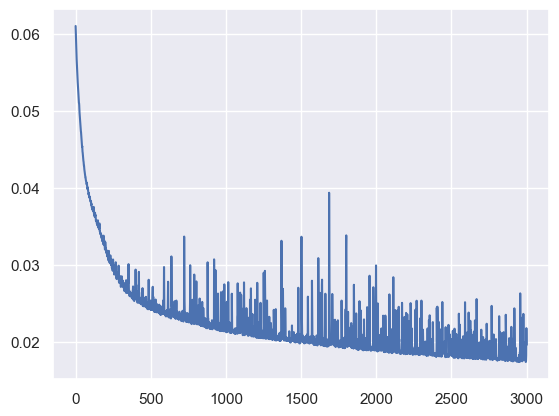

In [116]:
# plota as loss para ver se está treinando
plt.plot(historyfeh.history['loss'][:])

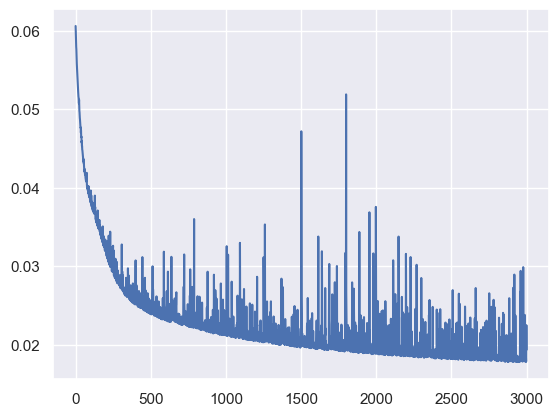

In [117]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyfeh.history['val_loss'][:]) #dar smoothie nas curvas kkkkkk para colocar no paper

# Testando modelos treinados

##### teff

In [46]:
predteff = modelteff.predict(X_test)

294/294 [==============================] - 1s 2ms/step


Text(0, 0.5, 'Y_test')

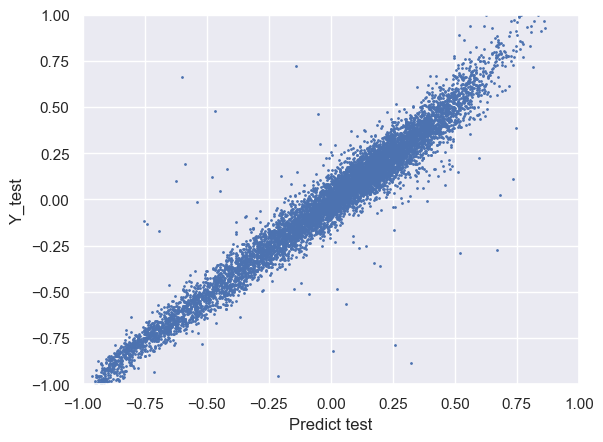

In [47]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predteff, Y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [154]:
score = r2_score(Y_test, predteff)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 97.0%


In [155]:
score = mean_absolute_error(Y_test, predteff)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.05


In [156]:
score = np.sqrt(mean_absolute_error(Y_test, predteff))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.22


##### logg

In [159]:
predlogg = modellogg.predict(X_test)

294/294 [==============================] - 1s 3ms/step


In [160]:
#encoder.decode_DataFrame(predologg, "logg_training")

Text(0, 0.5, 'Y_test')

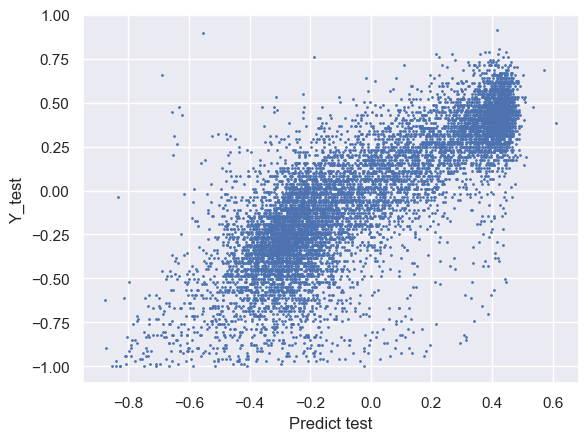

In [161]:
# plota o pred de acordo com o Y_test (logg)
plt.scatter(predlogg, Y_test, s=1)
#plt.xlim(3, 5)
#plt.ylim(3, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [162]:
score = r2_score(Y_test, predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 66.0%


In [163]:
score = mean_absolute_error(Y_test, predlogg)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.16


In [164]:
score = np.sqrt(mean_absolute_error(Y_test, predlogg))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.4


##### feh

In [118]:
predfeh = modelfeh.predict(X_test)

294/294 [==============================] - 1s 2ms/step


Text(0, 0.5, 'Y_test')

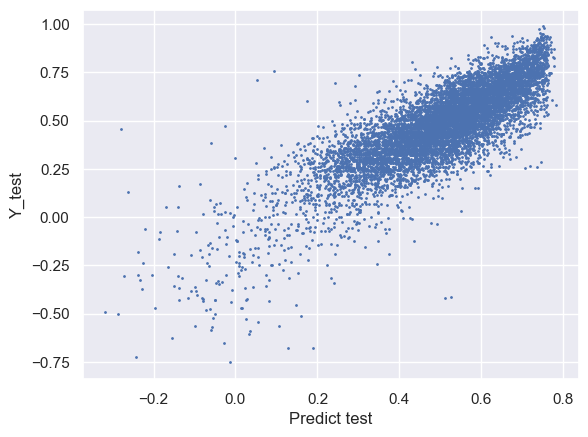

In [120]:
# plota o pred de acordo com o Y_test (feh)
plt.scatter(predfeh, Y_test, s=1)
#plt.xlim(-3, 1)
#plt.ylim(-3, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [121]:
score = r2_score(Y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 67.0%


In [122]:
score = mean_absolute_error(Y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.09


In [123]:
score = np.sqrt(mean_absolute_error(Y_test, predfeh))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.3


In [39]:
for i in range(len(pred)):
    print(f'{pred[i]} - {np.array(Y_test)[i]}')

[-0.01653169] - [0.10436812]
[-0.0164127] - [0.12504168]
[-0.01655977] - [0.16505502]
[-0.01605693] - [-0.26775592]
[-0.01719073] - [-0.31977326]
[-0.01660319] - [-0.79393131]
[-0.01743995] - [-0.20306769]
[-0.01610001] - [-0.30576859]
[-0.01593579] - [-0.3957986]
[-0.01600106] - [-0.53117706]
[-0.01713799] - [0.31177059]
[-0.01663167] - [0.46115372]
[-0.01659522] - [-0.11103701]
[-0.0163922] - [0.10370123]
[-0.0168667] - [-0.48849617]
[-0.01728272] - [-0.07835945]
[-0.01648687] - [0.23107703]
[-0.01596602] - [-0.75125042]
[-0.01706299] - [0.20906969]
[-0.01727004] - [-0.01767256]
[-0.01663666] - [0.31843948]
[-0.01672502] - [0.28309436]
[-0.0164045] - [-0.17039013]
[-0.01630088] - [0.00033344]
[-0.0166153] - [0.56585529]
[-0.01672463] - [0.1357119]
[-0.01670246] - [-0.78459486]
[-0.01689277] - [0.02167389]
[-0.0165698] - [0.28442814]
[-0.01643093] - [-0.20306769]
[-0.01682014] - [-0.8246082]
[-0.01709703] - [0.04234745]
[-0.0168339] - [0.32710904]
[-0.01652981] - [-0.7705902]
[-0.0164

[-0.01645855] - [0.03567856]
[-0.01649794] - [0.18972991]
[-0.01685493] - [0.12304101]
[-0.01700574] - [0.24708236]
[-0.01723836] - [-0.31243748]
[-0.01828946] - [0.53251084]
[-0.01629045] - [-0.39846616]
[-0.01658951] - [0.21707236]
[-0.01602059] - [-0.4624875]
[-0.01655132] - [0.25775258]
[-0.01618243] - [-0.15771924]
[-0.01646179] - [0.08636212]
[-0.01750152] - [-0.08969657]
[-0.01642973] - [-0.01833945]
[-0.01669034] - [0.18772924]
[-0.01789594] - [-0.26375458]
[-0.01674598] - [0.06102034]
[-0.01679963] - [-0.51583861]
[-0.01728839] - [0.41513838]
[-0.01662131] - [0.20973658]
[-0.01640589] - [-0.00566856]
[-0.01756053] - [0.05968656]
[-0.01771483] - [0.34844948]
[-0.01611613] - [-0.22507503]
[-0.01791413] - [0.66255418]
[-0.01892938] - [0.42980994]
[-0.01657025] - [0.02634211]
[-0.01639197] - [-0.13104368]
[-0.01689706] - [-0.43381127]
[-0.01724554] - [0.18506169]
[-0.01667199] - [0.4924975]
[-0.01639934] - [0.12904301]
[-0.01781918] - [0.31843948]
[-0.01787825] - [-0.03834612]
[-0

[-0.01660512] - [-0.25241747]
[-0.01780531] - [-0.35578526]
[-0.01755435] - [0.4804935]
[-0.01630076] - [-0.11970657]
[-0.01791588] - [0.03701234]
[-0.01654501] - [0.35378459]
[-0.01627827] - [-0.33844615]
[-0.01582661] - [-0.4198066]
[-0.01558513] - [-0.64788263]
[-0.01683811] - [0.0816939]
[-0.0160722] - [-0.34178059]
[-0.01789093] - [0.10770257]
[-0.01637072] - [0.11103701]
[-0.01641654] - [0.08236079]
[-0.01700184] - [0.38179393]
[-0.01746067] - [0.41513838]
[-0.01672799] - [-0.6132044]
[-0.01668143] - [0.24708236]
[-0.01728919] - [-0.66988996]
[-0.01694541] - [-0.42714238]
[-0.01651344] - [0.06768923]
[-0.01635009] - [0.03367789]
[-0.01700936] - [0.15505168]
[-0.01690149] - [-0.06502167]
[-0.01764742] - [0.9153051]
[-0.01638438] - [0.15305102]
[-0.01612722] - [-0.25908636]
[-0.01629251] - [-0.06835612]
[-0.01763986] - [0.23974658]
[-0.01795583] - [0.23441147]
[-0.01658437] - [0.32444148]
[-0.01662675] - [0.3717906]
[-0.01724274] - [0.31377126]
[-0.01634398] - [0.03101034]
[-0.0154

[-0.0165527] - [0.25508503]
[-0.01696367] - [0.04234745]
[-0.01831838] - [-0.25241747]
[-0.0164253] - [0.13304435]
[-0.0164202] - [-0.01167056]
[-0.01663055] - [0.1723908]
[-0.01652448] - [0.07502501]
[-0.01660411] - [0.30376792]
[-0.01754193] - [0.45848616]
[-0.01693603] - [-0.4804935]
[-0.01601666] - [-0.32510837]
[-0.01775426] - [0.15038346]
[-0.01649719] - [0.24108036]
[-0.01745045] - [0.18106035]
[-0.01644963] - [0.18172724]
[-0.01605029] - [-0.22840947]
[-0.01649569] - [0.03701234]
[-0.01613047] - [-0.39646549]
[-0.01628291] - [-0.05035012]
[-0.01778159] - [0.29509837]
[-0.01752906] - [-0.06235412]
[-0.01643795] - [0.01633878]
[-0.01665209] - [0.0936979]
[-0.0163798] - [-0.61787262]
[-0.0168028] - [0.34044682]
[-0.01718529] - [-0.21507169]
[-0.01632306] - [0.01233745]
[-0.01714397] - [0.35711904]
[-0.01779806] - [-0.39046349]
[-0.01644585] - [0.0576859]
[-0.01587528] - [-0.67522508]
[-0.01641118] - [0.07835945]
[-0.01774746] - [0.10370123]
[-0.01639793] - [-0.09436479]
[-0.016382

[-0.01653562] - [0.16105368]
[-0.01684469] - [0.02834278]
[-0.01609569] - [-0.31043681]
[-0.01656495] - [0.20373458]
[-0.01605884] - [-0.36445482]
[-0.01709988] - [0.19773258]
[-0.01666368] - [0.27042347]
[-0.01775464] - [0.51583861]
[-0.01719751] - [-0.62454151]
[-0.01651961] - [0.35378459]
[-0.01633592] - [-0.11437146]
[-0.01633728] - [-0.12770924]
[-0.01643472] - [0.17572524]
[-0.01731284] - [-0.36112037]
[-0.01734452] - [0.03101034]
[-0.01789354] - [-0.69523174]
[-0.01728237] - [0.76525509]
[-0.01631436] - [-0.75591864]
[-0.01643317] - [-0.2384128]
[-0.01754528] - [0.17172391]
[-0.01655378] - [0.16905635]
[-0.01830481] - [0.51317106]
[-0.01637268] - [-0.04301434]
[-0.01775841] - [0.39513171]
[-0.01768951] - [0.12637546]
[-0.01673838] - [0.14904968]
[-0.01682598] - [-0.16972324]
[-0.0175162] - [0.10103368]
[-0.01679049] - [-0.34844948]
[-0.0174406] - [0.15171724]
[-0.01636565] - [-0.10236746]
[-0.0168672] - [0.47315772]
[-0.01625465] - [-0.12170724]
[-0.01651735] - [0.08969657]
[-0.

[-0.01770855] - [-0.45115038]
[-0.01603478] - [-0.48849617]
[-0.01711386] - [0.28242748]
[-0.01711472] - [0.06835612]
[-0.01720216] - [-0.19906636]
[-0.01695013] - [0.03234411]
[-0.01697752] - [0.01033678]
[-0.01614857] - [-0.23774592]
[-0.01694431] - [-0.14104702]
[-0.01623188] - [-0.1963988]
[-0.01670451] - [0.36245415]
[-0.01642333] - [0.08569523]
[-0.01712086] - [-0.77192397]
[-0.01656627] - [0.10770257]
[-0.01789467] - [-0.37045682]
[-0.01705125] - [0.37845949]
[-0.01760638] - [-0.49716572]
[-0.01720372] - [0.37912638]
[-0.01639787] - [-0.32977659]
[-0.01677344] - [-0.65855285]
[-0.01542979] - [-0.83327776]
[-0.01647913] - [0.06635545]
[-0.01687739] - [0.45515172]
[-0.01683156] - [-0.32510837]
[-0.0180788] - [-0.02834278]
[-0.01771458] - [0.16105368]
[-0.01602149] - [-0.27575859]
[-0.01733322] - [0.36045348]
[-0.01677316] - [0.15305102]
[-0.01687529] - [-0.68856285]
[-0.01599811] - [-0.45515172]
[-0.01658414] - [0.03034345]
[-0.01603158] - [-0.01967322]
[-0.01650591] - [0.28176059

[-0.01755303] - [0.22840947]
[-0.01632137] - [-0.09636546]
[-0.01694937] - [0.25175058]
[-0.01795583] - [-0.11570524]
[-0.01640976] - [0.09836612]
[-0.01635421] - [0.05568523]
[-0.01701529] - [0.08836279]
[-0.01642936] - [-0.01167056]
[-0.01645054] - [0.05835278]
[-0.01765026] - [-0.46982327]
[-0.017203] - [0.52584195]
[-0.01667711] - [-0.33844615]
[-0.01634713] - [-0.03767923]
[-0.01629433] - [-0.8732911]
[-0.0165433] - [0.28976325]
[-0.01752366] - [0.24841614]
[-0.01682671] - [0.17772591]
[-0.01746516] - [0.35178393]
[-0.01528125] - [-0.88329443]
[-0.01641044] - [0.21240413]
[-0.01657732] - [-0.34178059]
[-0.01690208] - [0.00966989]
[-0.01662407] - [0.4198066]
[-0.01705695] - [-0.34978326]
[-0.01640954] - [-0.02767589]
[-0.01684946] - [0.53384461]
[-0.01636179] - [-0.04368123]
[-0.01718896] - [-0.14304768]
[-0.01706508] - [-0.3231077]
[-0.0166405] - [0.41313771]
[-0.01681572] - [0.22507503]
[-0.01756062] - [0.40513505]
[-0.01668863] - [0.58786262]
[-0.01726097] - [0.25575192]
[-0.017

In [174]:
a = []
f = 0
for i in range(len(pred)):
    a.append(pred[i] - np.array(Y_test)[i])
    f += int(pred[i] - np.array(Y_test)[i])

In [175]:
f/len(pred)

-0.0017262875227774049

In [176]:
a = np.array(a)

In [177]:
print(f'MAX: {a.max()}')
print(f'MIN: {a.min()}')
print(f'MEAN: {a.mean()}')

MAX: 1.6103280067443846
MIN: -17.713723373413085
MEAN: -0.020520809442062127


In [50]:
score = r2_score(Y_test, pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [52]:
score = mean_absolute_error(Y_test, pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.06


In [67]:
score = np.sqrt(mean_absolute_error(Y_test, pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))


The Mean Absolute Error of our Model is 0.24


In [64]:
x = scaler.inverse_transform(pred)

In [65]:
y = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'Y_test')

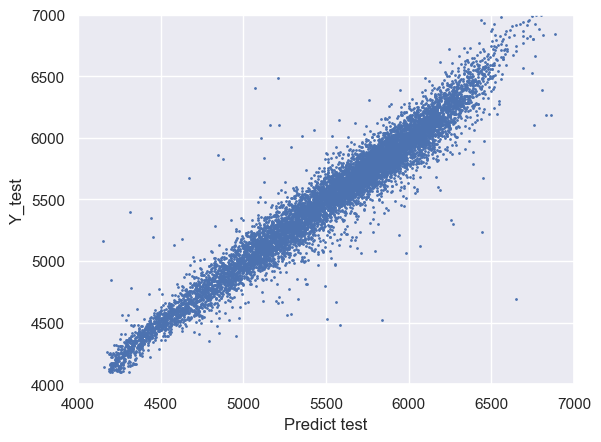

In [66]:
# plota o pred de acordo com o Y_test (teff) removendo a normalização
plt.scatter(x, y, s=1)
plt.xlim(4000, 7000)
plt.ylim(4000, 7000)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

# Aplicando rede treinada

In [185]:
csv2 = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])

In [186]:
csv2

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926


In [187]:
ndf = csv2[['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [188]:
ndf.shape

(2187, 12)

In [189]:
aply_x = ndf.to_numpy()

In [190]:
#scaler = MinMaxScaler(feature_range = (-1,1))

In [192]:
aply_n= scaler.fit_transform(aply_x)

In [229]:
#when applying the model to your data (eg., jplus dr1), please run the following code.
#model=load_model('model/model_lamost_teff_V2_Final.h5')
result=model.predict(aply_n)

69/69 [==============================] - 0s 2ms/step


In [230]:
result

array([[-0.32188916],
       [ 0.46823418],
       [ 0.52766514],
       ...,
       [-0.08489259],
       [-0.21540591],
       [ 0.16249362]], dtype=float32)

In [231]:
x = scaler.inverse_transform(result)

In [232]:
x

array([[5065.827 ],
       [6250.617 ],
       [6339.734 ],
       ...,
       [5421.2036],
       [5225.499 ],
       [5792.159 ]], dtype=float32)

In [197]:
#csv3 = csv2

In [235]:
csv3['teff_predict'] = x

In [236]:
csv3

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal,feh_predict,logg_predict,teff_predict
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615,-0.058913,3.635599,5065.827148
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160,-0.059050,3.595240,6250.617188
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880,-0.057255,3.681078,6339.733887
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966,0.207014,3.488342,5085.914062
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895,0.050466,3.624842,6131.705566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498,0.737091,3.661139,5282.076660
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769,0.745572,3.606813,5205.132812
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926,0.871691,3.857249,5421.203613


In [237]:
csv3.to_csv("Halpha_Final.csv")